In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os


In [21]:
pwd


'/home/amitpandey/iiith/CV-2021/assignment/assignment-1-AmitPandey-Research/src'

In [22]:
path = "../calibration-data/"

a = os.path.isdir(path)
print(a)

calibration_object = cv2.imread(os.path.join(path,"calib-object.jpg"))

True


In [23]:
type(calibration_object)

numpy.ndarray

In [24]:
# to print using cv2
#image_window = 'calibration_object'
#cv2.imshow(image_window,calibration_object)
#cv2.waitKey(0) 
  
# closing all open windows 
#cv2.destroyAllWindows() 

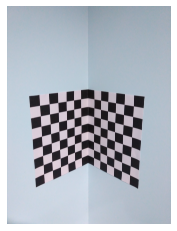

In [25]:
plt.imshow(calibration_object)
plt.axis('off')
plt.show()

In [26]:
[print(i) for i in dir(cv2) if 'EVENT' in i] # just to check the events present

EVENT_FLAG_ALTKEY
EVENT_FLAG_CTRLKEY
EVENT_FLAG_LBUTTON
EVENT_FLAG_MBUTTON
EVENT_FLAG_RBUTTON
EVENT_FLAG_SHIFTKEY
EVENT_LBUTTONDBLCLK
EVENT_LBUTTONDOWN
EVENT_LBUTTONUP
EVENT_MBUTTONDBLCLK
EVENT_MBUTTONDOWN
EVENT_MBUTTONUP
EVENT_MOUSEHWHEEL
EVENT_MOUSEMOVE
EVENT_MOUSEWHEEL
EVENT_RBUTTONDBLCLK
EVENT_RBUTTONDOWN
EVENT_RBUTTONUP


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [27]:
#%matplotlib tk

In [28]:
#image = cv2.imread(os.path.join(path,"calib-object.jpg"))

In [29]:
#to show how to use interactive matplotlib to get points. A new window pops up and there we can click using our mouse
# and that event is captured and the points stored in a list.

'''

%matplotlib tk

x_list_mpl= []
y_list_mpl = []

fig = plt.figure(figsize=(30,30))

 

img= cv2.imread(os.path.join(path,"calib-object.jpg"))

 

def onclick(event):
    x_cor = event.xdata
    y_cor = event.ydata
    x_list_mpl.extend([x_cor])
    y_list_mpl.extend([y_cor])
    
 

cid = fig.canvas.mpl_connect('button_press_event', onclick)

 

imgplot = plt.imshow(img)
plt.show() '''

'\n\n%matplotlib tk\n\nx_list_mpl= []\ny_list_mpl = []\n\nfig = plt.figure(figsize=(30,30))\n\n \n\nimg= cv2.imread(os.path.join(path,"calib-object.jpg"))\n\n \n\ndef onclick(event):\n    x_cor = event.xdata\n    y_cor = event.ydata\n    x_list_mpl.extend([x_cor])\n    y_list_mpl.extend([y_cor])\n    \n \n\ncid = fig.canvas.mpl_connect(\'button_press_event\', onclick)\n\n \n\nimgplot = plt.imshow(img)\nplt.show() '

In [30]:
x_list_mpl,y_list_mpl # just to show interactive ploting to get points. we might use later for image captured using our own camera.

NameError: name 'x_list_mpl' is not defined

In [31]:
#I have my image coordinates stored in a file, I am reading my coordinates from that file and storing  
# in two different lists of x and y to be used later.

x_list = []
y_list = []

textfilepath = "../amit.txt"
with open(textfilepath,'r') as file:  # note : when path already has double inverted commas, dont use double inverted comma with path in the with open function...
   a = file.readlines()
   
   print(a)

print('-----------------------')

print (type(x_list))
print('-----------------------')


for i in range (len(a)):
    x_cor,y_cor = a[i].strip('\n').split(',')
    x_cor = float(x_cor)
    y_cor = float(y_cor)
    x_list.extend([x_cor])
    y_list.extend([y_cor])
    
print (x_list)
    

['628,1897\n', '817,2070\n', '1417,1944\n', '1548,2081\n', '1790,2160\n', '1922,2191\n', '1780,2481\n', '1290,2639\n', '1012,2749\n', '864,2975\n', '2074,1855\n', '2222,2270\n', '2195,2991\n', '2053,2765\n', '1175,3017\n', '664,2497\n', '1543,2854\n', '2201,2630\n', '987,2029\n', '1129,1816\n', '1665,1771\n', '2414,1900\n', '2382,2507\n', '626,2094\n', '2401,2120\n']
-----------------------
<class 'list'>
-----------------------
[628.0, 817.0, 1417.0, 1548.0, 1790.0, 1922.0, 1780.0, 1290.0, 1012.0, 864.0, 2074.0, 2222.0, 2195.0, 2053.0, 1175.0, 664.0, 1543.0, 2201.0, 987.0, 1129.0, 1665.0, 2414.0, 2382.0, 626.0, 2401.0]


In [32]:
tupl = list(zip(x_list,y_list)) # tupl is actually a list of tupples formed using zipping two iterables together and then casting as list, we could have made a dictionary as well.
print(tupl) #used this to plot label in the next cell

[(628.0, 1897.0), (817.0, 2070.0), (1417.0, 1944.0), (1548.0, 2081.0), (1790.0, 2160.0), (1922.0, 2191.0), (1780.0, 2481.0), (1290.0, 2639.0), (1012.0, 2749.0), (864.0, 2975.0), (2074.0, 1855.0), (2222.0, 2270.0), (2195.0, 2991.0), (2053.0, 2765.0), (1175.0, 3017.0), (664.0, 2497.0), (1543.0, 2854.0), (2201.0, 2630.0), (987.0, 2029.0), (1129.0, 1816.0), (1665.0, 1771.0), (2414.0, 1900.0), (2382.0, 2507.0), (626.0, 2094.0), (2401.0, 2120.0)]


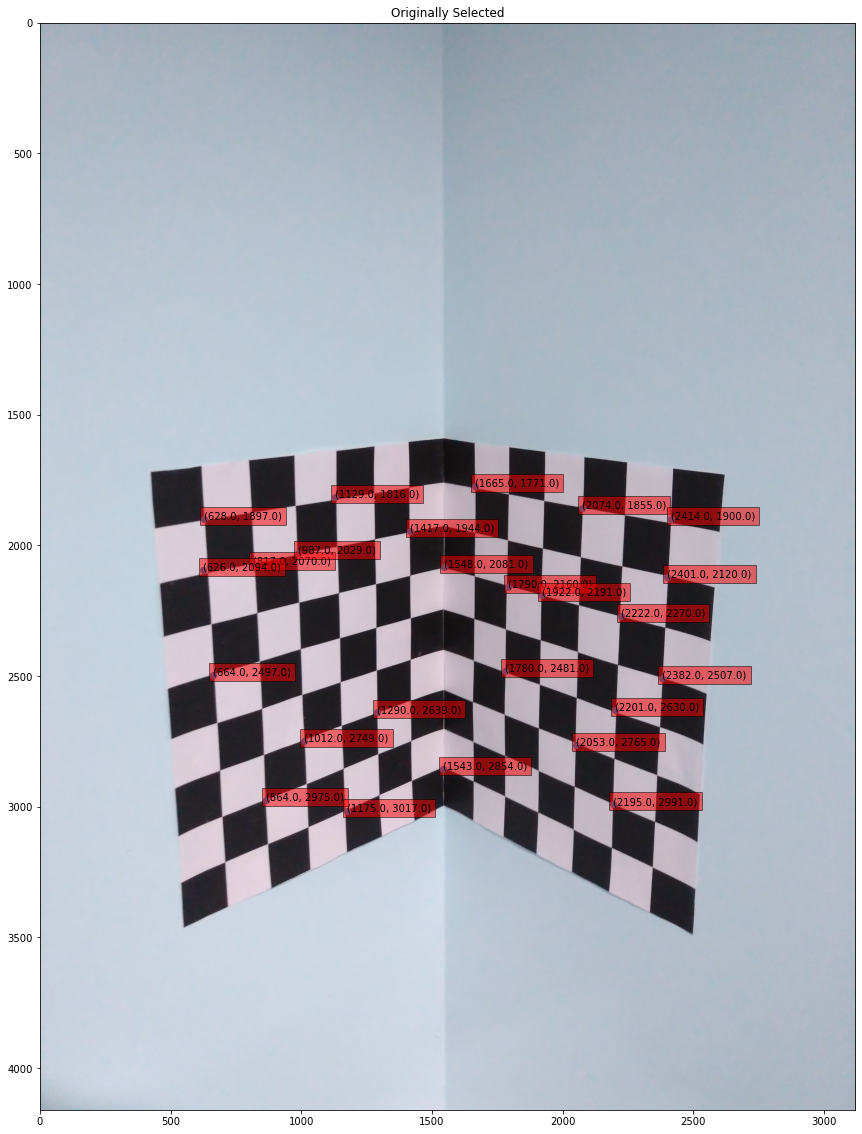

In [33]:
# points from paint tool and stored in the text file that we just read.

%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(calibration_object)
plt.scatter(x_list,y_list)
plt.title('Originally Selected')

for i in range(len(x_list)):
    tupl = list(zip(x_list,y_list))
    plt.text(x_list[i],y_list[i],tupl[i],bbox=dict(facecolor='red', alpha=0.5))


plt.show()

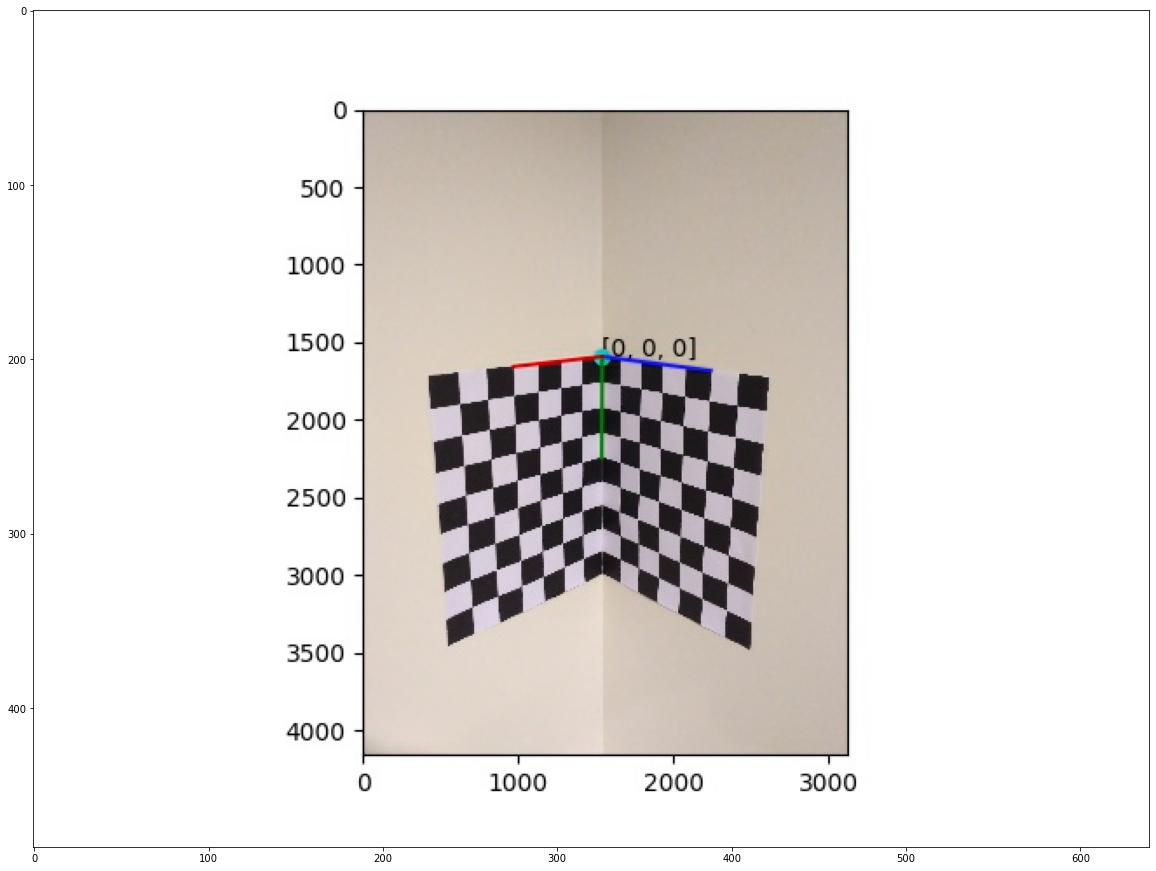

In [34]:
%matplotlib inline
calibration_object_legend = cv2.imread(os.path.join(path,"calib-object-legend.jpg"))
plt.figure(figsize=(20,20))
plt.imshow(calibration_object_legend)
#plt.scatter(x_list,y_list)
plt.show()

NOW WE WILL BE MANUALLY FINDING THE WORLD COORDINATES FOR THE SELECTED IMAGE COORDINATES.

In [35]:
#manually finding the world coordinate.
world_cord = np.array([[6,1,0],[5,2,0],[1,2,0],[0,3,0],[0,3,2],[0,3,3],[0,5,2],[2,6,0],[4,6,0],[5,7,0],[0,1,4],[0,3,5],[0,7,5],[0,6,4],[3,8,0],[6,4,0],[0,8,1],[0,5,4],[4,2,0],[3,1,0],[0,1,2],[0,1,7],[0,4,7],[6,2,0],[0,2,7]], dtype = np.float32)
world_cord

array([[6., 1., 0.],
       [5., 2., 0.],
       [1., 2., 0.],
       [0., 3., 0.],
       [0., 3., 2.],
       [0., 3., 3.],
       [0., 5., 2.],
       [2., 6., 0.],
       [4., 6., 0.],
       [5., 7., 0.],
       [0., 1., 4.],
       [0., 3., 5.],
       [0., 7., 5.],
       [0., 6., 4.],
       [3., 8., 0.],
       [6., 4., 0.],
       [0., 8., 1.],
       [0., 5., 4.],
       [4., 2., 0.],
       [3., 1., 0.],
       [0., 1., 2.],
       [0., 1., 7.],
       [0., 4., 7.],
       [6., 2., 0.],
       [0., 2., 7.]], dtype=float32)

# Question 1: a) Projections for 28mm and 2800mm scale

In [36]:
# case 1 when each block = 28 mm

world_cord = world_cord*0.028

In [37]:
world_cord 

array([[0.16800001, 0.028     , 0.        ],
       [0.14      , 0.056     , 0.        ],
       [0.028     , 0.056     , 0.        ],
       [0.        , 0.08400001, 0.        ],
       [0.        , 0.08400001, 0.056     ],
       [0.        , 0.08400001, 0.08400001],
       [0.        , 0.14      , 0.056     ],
       [0.056     , 0.16800001, 0.        ],
       [0.112     , 0.16800001, 0.        ],
       [0.14      , 0.19600001, 0.        ],
       [0.        , 0.028     , 0.112     ],
       [0.        , 0.08400001, 0.14      ],
       [0.        , 0.19600001, 0.14      ],
       [0.        , 0.16800001, 0.112     ],
       [0.08400001, 0.224     , 0.        ],
       [0.16800001, 0.112     , 0.        ],
       [0.        , 0.224     , 0.028     ],
       [0.        , 0.14      , 0.112     ],
       [0.112     , 0.056     , 0.        ],
       [0.08400001, 0.028     , 0.        ],
       [0.        , 0.028     , 0.056     ],
       [0.        , 0.028     , 0.19600001],
       [0.

In [38]:
world_cord[0][0] #just checking

0.16800001

In [39]:
world_cord_x = world_cord[:,0]
world_cord_y = world_cord[:,1]
world_cord_z = world_cord[:,2]

In [40]:
world_cord_x # just checking if getting correct output.

array([0.16800001, 0.14      , 0.028     , 0.        , 0.        ,
       0.        , 0.        , 0.056     , 0.112     , 0.14      ,
       0.        , 0.        , 0.        , 0.        , 0.08400001,
       0.16800001, 0.        , 0.        , 0.112     , 0.08400001,
       0.        , 0.        , 0.        , 0.16800001, 0.        ],
      dtype=float32)

Now we will form the 12x12 matrix whose two rows look like 

|Xi Yi Zi 1 0 0 0 0 -uiXi -uiYi -uiZi -ui |
|0 0 0 0 Xi Yi Zi 1 -viXi -viXi - viZi -vi|

In [41]:
# just to check
#ar1 = np.arange(24).reshape(2,12) 
#ar1

In [42]:
# just to check
#ar2 = np.vstack((ar1,ar1))
#ar2

In [43]:
# just to check
#myimage = np.array([[255,0],[0,255]])

#plt.imshow(myimage, cmap='gray')

In [44]:
#creating a 2d arrays of zeros to be stacked with other values and form the matrix

Matx = np.zeros(24).reshape(2,12)
Matx

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

First I created a 2x12 array of zeros, in this I will vertically stack 2x12 array for ui, vi and make it a 
total 14x12 matrix/array. Then slice of the top two rows to finally have just the 12x12 matrix.

In [45]:
for i in range (6):
    internal_parameters = np.array([[world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, 0, 0, 0, 0, -(x_list[i]*world_cord_x[i]), -(x_list[i]*world_cord_y[i]), -(x_list[i]*world_cord_z[i]), -(x_list[i])],
                                   [0, 0, 0, 0, world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, -(y_list[i]*world_cord_x[i]), -(y_list[i]*world_cord_y[i]), -(y_list[i]*world_cord_z[i]), -(y_list[i])]])
    
    Matx = np.vstack((Matx,internal_parameters))
    
Matx = Matx[2:] # removing the first two rows

In [46]:
Matx 

array([[ 1.68000013e-01,  2.80000009e-02,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.05504008e+02,
        -1.75840005e+01, -0.00000000e+00, -6.28000000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.68000013e-01,  2.80000009e-02,
         0.00000000e+00,  1.00000000e+00, -3.18696024e+02,
        -5.31160016e+01, -0.00000000e+00, -1.89700000e+03],
       [ 1.40000001e-01,  5.60000017e-02,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.14380000e+02,
        -4.57520014e+01, -0.00000000e+00, -8.17000000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.40000001e-01,  5.60000017e-02,
         0.00000000e+00,  1.00000000e+00, -2.89800001e+02,
        -1.15920004e+02, -0.00000000e+00, -2.07000000e+03],
       [ 2.80000009e-02,  5.60000017e-02,  0.0000000

Now performing SVD on the matrix to find solution for this over determined system. The theory is :

for an overdetermined system, since twelve equations and only 11 unknows (since p34 ie twelth element in the p or projection matrix is '1'. Mp = 0 is overdetermined system of linear equation. We find least square error using concept of pseudo inverse and SVD.

In [47]:
u, s, vh = np.linalg.svd(Matx, full_matrices=True) # performing svd on the matrix

In [48]:
vh.shape #checking the shape of V matrix

(12, 12)

In [49]:
transpose_of_vt = vh.T


In [50]:
p_argmin = transpose_of_vt[:,np.argmin(s)]
p_argmin

array([-6.81266930e-01, -1.35790046e-02,  3.32819717e-01,  1.67872289e-01,
       -1.90565299e-01,  5.73372107e-01, -2.45689936e-02,  1.76256994e-01,
       -1.48875230e-04, -3.11900355e-05, -7.62920801e-05,  1.10371582e-04])

In [51]:
p = transpose_of_vt[:,11] # Picking the last column of the 'V' matrix or pick last row of 'Vh' and transpose it

In [52]:
p = p.reshape(3,4) # reshape the vector to form a 3x4 projection matrix.




In [53]:
p

array([[-6.81266930e-01, -1.35790046e-02,  3.32819717e-01,
         1.67872289e-01],
       [-1.90565299e-01,  5.73372107e-01, -2.45689936e-02,
         1.76256994e-01],
       [-1.48875230e-04, -3.11900355e-05, -7.62920801e-05,
         1.10371582e-04]])

In [145]:
# to make p34 = 1 we will divide the whole matrix by the last term.
#It was verified that result with and without dividing the whole matrix by the last term yeilds the same result.

projection_matx = p/p[2][3]
#projection_matx = p
Main_experiment_P = projection_matx


In [146]:
Main_experiment_P

array([[-6.15590640e+00, -5.26363370e-01,  2.80262669e+00,
         1.50958002e+03],
       [-2.03013987e+00,  4.27795148e+00, -3.42629462e-01,
         1.61192392e+03],
       [-1.48217460e-03, -6.34080739e-04, -7.31899665e-04,
         1.00000000e+00]])

In [55]:
#Just checking

#a = []
#b = [1,2,3]
#a.append(b)
#a.append(b)
#a

In [56]:
#just checking:
#a = np.array(['a','b'])
#a


In [57]:
#Just to check

empt = np.array([]) # made an empty array and checked if we can append to an empty array.

l1 = [1,2,3]

empt = np.append(empt,l1) #array of list.
empt = np.append(empt,l1)
empt

array([1., 2., 3., 1., 2., 3.])

In [58]:
list_of_homogenous_worldcord = [] # making an empty list

for i in range (len(world_cord_x)):
    homo = [world_cord_x[i],world_cord_y[i],world_cord_z[i],1] # converting euclidean to homogeneous coordinate
    #print(type(homo))
    list_of_homogenous_worldcord.append(homo) # appending to list to make a list of list.

In [59]:
list_of_homogenous_worldcord

[[0.16800001, 0.028, 0.0, 1],
 [0.14, 0.056, 0.0, 1],
 [0.028, 0.056, 0.0, 1],
 [0.0, 0.08400001, 0.0, 1],
 [0.0, 0.08400001, 0.056, 1],
 [0.0, 0.08400001, 0.08400001, 1],
 [0.0, 0.14, 0.056, 1],
 [0.056, 0.16800001, 0.0, 1],
 [0.112, 0.16800001, 0.0, 1],
 [0.14, 0.19600001, 0.0, 1],
 [0.0, 0.028, 0.112, 1],
 [0.0, 0.08400001, 0.14, 1],
 [0.0, 0.19600001, 0.14, 1],
 [0.0, 0.16800001, 0.112, 1],
 [0.08400001, 0.224, 0.0, 1],
 [0.16800001, 0.112, 0.0, 1],
 [0.0, 0.224, 0.028, 1],
 [0.0, 0.14, 0.112, 1],
 [0.112, 0.056, 0.0, 1],
 [0.08400001, 0.028, 0.0, 1],
 [0.0, 0.028, 0.056, 1],
 [0.0, 0.028, 0.19600001, 1],
 [0.0, 0.112, 0.19600001, 1],
 [0.16800001, 0.056, 0.0, 1],
 [0.0, 0.056, 0.19600001, 1]]

In [60]:
#array_of_homogenous_wordcord = np.array(list_of_homogenous_worldcord)
#array_of_homogenous_wordcord

In [62]:
# just to check
#a = array_of_homogenous_wordcord[0]
#a.tolist()
#a[0]

#pro = projection_matx@a
#pro/pro[2]

In [63]:
list_of_projected_image_cord_in_euclidean = []

for i in range (len(list_of_homogenous_worldcord)):
    world_cord_homo = list_of_homogenous_worldcord[i] # selecting points one by one and finding projection
    projection = projection_matx@world_cord_homo# using projection matrix having p34 as 1
    projection = projection/projection[2]
    list_of_projected_image_cord_in_euclidean.append(projection)
    
    

In [64]:
list_of_projected_image_cord_in_euclidean

[array([6.27778062e+02, 1.89728623e+03, 1.00000000e+00]),
 array([8.17185305e+02, 2.06973920e+03, 1.00000000e+00]),
 array([1.41720701e+03, 1.94368118e+03, 1.00000000e+00]),
 array([1.54737027e+03, 2.08275529e+03, 1.00000000e+00]),
 array([1.79136914e+03, 2.15545014e+03, 1.00000000e+00]),
 array([1.92108335e+03, 2.19409604e+03, 1.00000000e+00]),
 array([1.81465032e+03, 2.50807680e+03, 1.00000000e+00]),
 array([1.31660248e+03, 2.70585077e+03, 1.00000000e+00]),
 array([1.00939984e+03, 2.84023212e+03, 1.00000000e+00]),
 array([8.37172703e+02, 3.14039765e+03, 1.00000000e+00]),
 array([2.02833769e+03, 1.87769217e+03, 1.00000000e+00]),
 array([2.19763896e+03, 2.27649056e+03, 1.00000000e+00]),
 array([2.26342542e+03, 3.04772456e+03, 1.00000000e+00]),
 array([2.10035456e+03, 2.79366735e+03, 1.00000000e+00]),
 array([1.18403130e+03, 3.17656769e+03, 1.00000000e+00]),
 array([6.33935822e+02, 2.54631345e+03, 1.00000000e+00]),
 array([1.72001527e+03, 3.00254730e+03, 1.00000000e+00]),
 array([2.0854

In [65]:
x_list_projected = []
y_list_projected = []

for i in range(len(list_of_projected_image_cord_in_euclidean)):
    x_list_projected.append(list_of_projected_image_cord_in_euclidean[i][0])
    y_list_projected.append(list_of_projected_image_cord_in_euclidean[i][1])

x_list_projected = [round(num) for num in x_list_projected] #rounding to nearest int
y_list_projected = [round(num) for num in y_list_projected]




    

In [66]:
list(zip(x_list_projected,y_list_projected))

[(628, 1897),
 (817, 2070),
 (1417, 1944),
 (1547, 2083),
 (1791, 2155),
 (1921, 2194),
 (1815, 2508),
 (1317, 2706),
 (1009, 2840),
 (837, 3140),
 (2028, 1878),
 (2198, 2276),
 (2263, 3048),
 (2100, 2794),
 (1184, 3177),
 (634, 2546),
 (1720, 3003),
 (2085, 2604),
 (988, 2034),
 (1137, 1818),
 (1769, 1815),
 (2462, 1983),
 (2519, 2564),
 (630, 2109),
 (2480, 2173)]

In [67]:
#now to find error over just the first 6 points that were used to find the projection matrix :


summation = 0.0

for i in range(6):
    print(x_list_projected[i])
    print(x_list[i])
    summation = summation + ((x_list_projected[i]-x_list[i])**2) + ((y_list_projected[i]-y_list[i])**2)

mean = summation/25

error = (mean)**0.5

error




628
628.0
817
817.0
1417
1417.0
1547
1548.0
1791
1790.0
1921
1922.0


1.2806248474865698

In [68]:
#now to find error over all the 25 points:


summation = 0.0

for i in range(len(x_list)):
    print(x_list_projected[i])
    print(x_list[i])
    summation = summation + ((x_list_projected[i]-x_list[i])**2) + ((y_list_projected[i]-y_list[i])**2)

mean = summation/25

error = (mean)**0.5

error




628
628.0
817
817.0
1417
1417.0
1547
1548.0
1791
1790.0
1921
1922.0
1815
1780.0
1317
1290.0
1009
1012.0
837
864.0
2028
2074.0
2198
2222.0
2263
2195.0
2100
2053.0
1184
1175.0
634
664.0
1720
1543.0
2085
2201.0
988
987.0
1137
1129.0
1769
1665.0
2462
2414.0
2519
2382.0
630
626.0
2480
2401.0


91.13265057047337

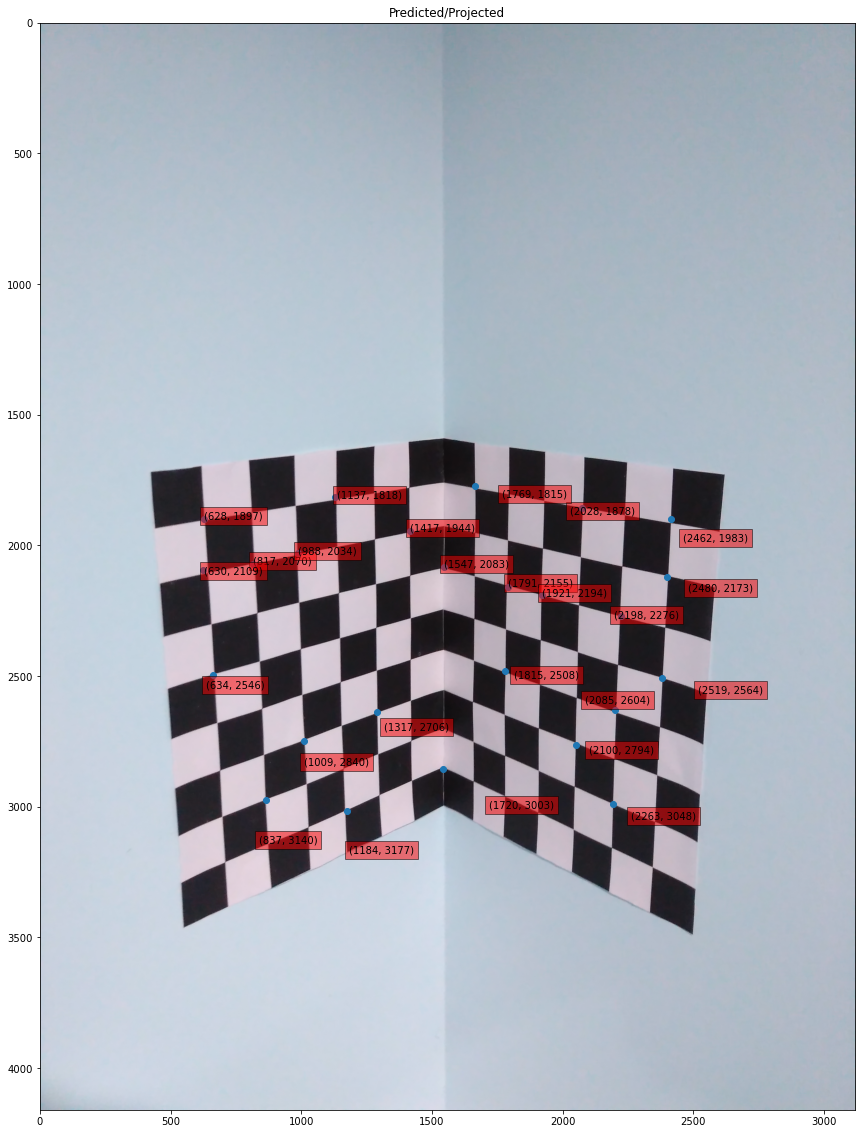

In [69]:
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(calibration_object)
plt.scatter(x_list,y_list)
plt.title('Predicted/Projected')

for i in range(len(x_list)):
    tupl = list(zip(x_list_projected,y_list_projected))
    plt.text(x_list_projected[i],y_list_projected[i],tupl[i],bbox=dict(facecolor='red', alpha=0.5))


plt.show()

We see that points are almost at the same spot. 

### We can observe that the scaling of world points do not create any difference in the projection matrix and 
### error for the points used to create the projection is exactly same.

[168. 140.  28.   0.   0.   0.   0.  56. 112. 140.   0.   0.   0.   0.
  84. 168.   0.   0. 112.  84.   0.   0.   0. 168.   0.]
-------------------------------
Projection matrix is:
[[-6.15590640e+00 -5.26363370e-01  2.80262669e+00  1.50958002e+03]
 [-2.03013987e+00  4.27795148e+00 -3.42629462e-01  1.61192392e+03]
 [-1.48217460e-03 -6.34080739e-04 -7.31899665e-04  1.00000000e+00]]
-------------------------------
[(628, 1897), (817, 2070), (1417, 1944), (1548, 2082), (1791, 2155), (1921, 2194), (1830, 2518), (1328, 2735), (1006, 2891), (815, 3242), (2009, 1881), (2200, 2278), (2326, 3107), (2138, 2825), (1192, 3272), (612, 2574), (1755, 3058), (2110, 2620), (990, 2034), (1140, 1820), (1755, 1819), (2437, 1984), (2546, 2576), (623, 2111), (2472, 2173)]
-------------------------------
628 1897
628.0 1897.0
-------------------------------
817 2070
817.0 2070.0
-------------------------------
1417 1944
1417.0 1944.0
-------------------------------
1548 2082
1548.0 2081.0
-------------------

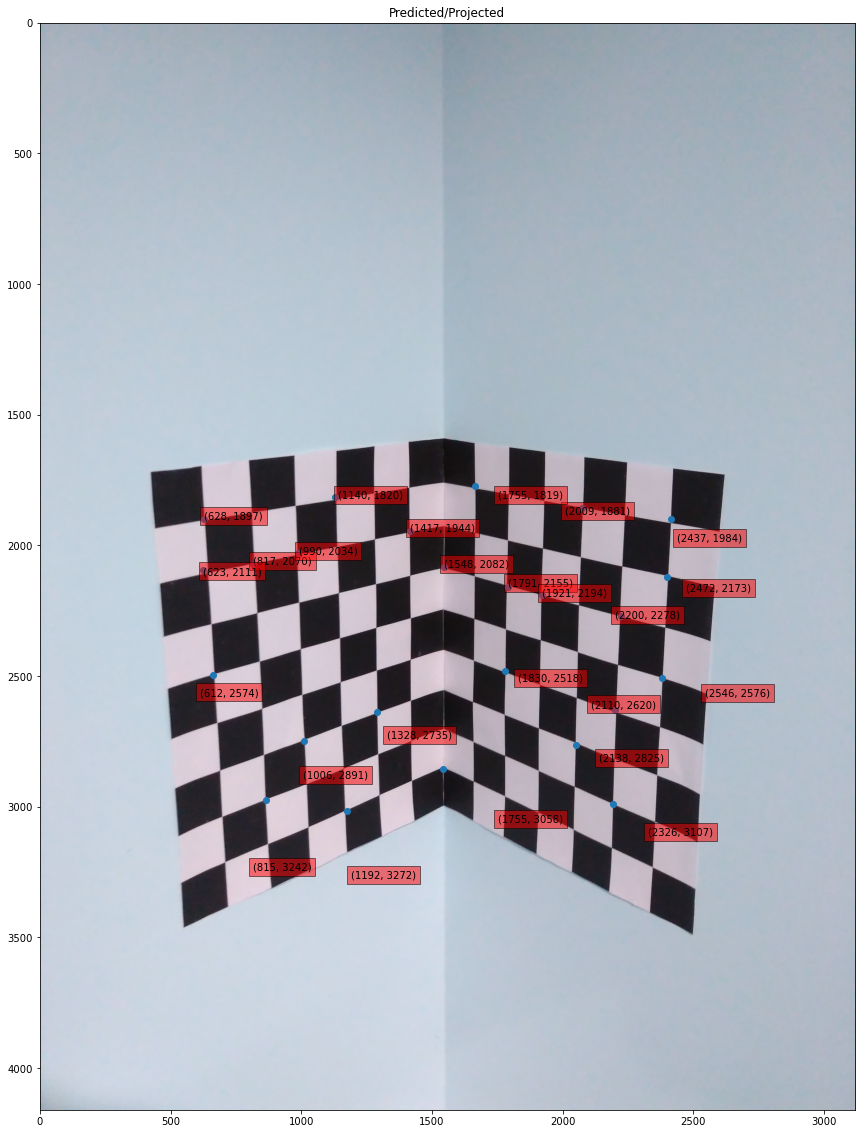

In [80]:
# Now we will follow the same steps for 2800 mm ie 28 m as object scale :

# case 2 when each block = 28 mm

#manually finding the world coordinate.
world_cord = np.array([[6,1,0],[5,2,0],[1,2,0],[0,3,0],[0,3,2],[0,3,3],[0,5,2],[2,6,0],[4,6,0],[5,7,0],[0,1,4],[0,3,5],[0,7,5],[0,6,4],[3,8,0],[6,4,0],[0,8,1],[0,5,4],[4,2,0],[3,1,0],[0,1,2],[0,1,7],[0,4,7],[6,2,0],[0,2,7]], dtype = np.float32)


world_cord = world_cord*28


world_cord_x = world_cord[:,0]
world_cord_y = world_cord[:,1]
world_cord_z = world_cord[:,2]

print(world_cord_x)
print('-------------------------------')


list_of_homogenous_worldcord = [] # making an empty list

for i in range (len(world_cord_x)):
    homo = [world_cord_x[i],world_cord_y[i],world_cord_z[i],1] # converting euclidean to homogeneous coordinate
    #print(type(homo))
    list_of_homogenous_worldcord.append(homo) # appending to list to make a list of list.
    
    
    

#----------------------------------------------------------    
    
Matx = np.zeros(24).reshape(2,12)

for i in range (6):
    internal_parameters = np.array([[world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, 0, 0, 0, 0, -(x_list[i]*world_cord_x[i]), -(x_list[i]*world_cord_y[i]), -(x_list[i]*world_cord_z[i]), -(x_list[i])],
                                   [0, 0, 0, 0, world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, -(y_list[i]*world_cord_x[i]), -(y_list[i]*world_cord_y[i]), -(y_list[i]*world_cord_z[i]), -(y_list[i])]])
    
    Matx = np.vstack((Matx,internal_parameters))
    
Matx = Matx[2:] # removing the first two rows


u, s, vh = np.linalg.svd(Matx, full_matrices=True) # performing svd on the matrix

transpose_of_vt = vh.T

p = transpose_of_vt[:,11] 

p = p.reshape(3,4) # reshape the vector to form a 3x4 projection matrix.

# to make p34 = 1 we will divide the whole matrix by the last term.
#It was verified that result with and without dividing the whole matrix by the last term yeilds the same result.

projection_matx = p/p[2][3]
#projection_matx = p
print('Projection matrix is:')
print(projection_matx)
print('-------------------------------')



    

#----------------------------------------------------------

list_of_projected_image_cord_in_euclidean = []

for i in range (len(list_of_homogenous_worldcord)):
    world_cord_homo = list_of_homogenous_worldcord[i] # selecting points one by one and finding projection
    projection = projection_matx@world_cord_homo# using projection matrix having p34 as 1
    projection = projection/projection[2]
    list_of_projected_image_cord_in_euclidean.append(projection)
    


    
x_list_projected = []
y_list_projected = []

for i in range(len(list_of_projected_image_cord_in_euclidean)):
    x_list_projected.append(list_of_projected_image_cord_in_euclidean[i][0])
    y_list_projected.append(list_of_projected_image_cord_in_euclidean[i][1])

x_list_projected = [round(num) for num in x_list_projected] #rounding to nearest int
y_list_projected = [round(num) for num in y_list_projected]




projected_coordinates = list(zip(x_list_projected,y_list_projected))    

print (projected_coordinates)
print('-------------------------------')


#----------------------------------------------------------------------

#now to find error over just the first 6 points that were used to find the projection matrix :


summation = 0.0

for i in range(6):
    print(x_list_projected[i],y_list_projected[i])
    print(x_list[i],y_list[i])
    print('-------------------------------')
    summation = summation + ((x_list_projected[i]-x_list[i])**2) + ((y_list_projected[i]-y_list[i])**2)

mean = summation/25

error = (mean)**0.5

print(f'error is {error}')
print('-------------------------------')

#now to find error over just the first 6 points that were used to find the projection matrix :


summation = 0.0

for i in range(len(x_list)):
    print(x_list_projected[i],y_list_projected[i])
    print(x_list[i],y_list[i])
    print('-------------------------------')
    summation = summation + ((x_list_projected[i]-x_list[i])**2) + ((y_list_projected[i]-y_list[i])**2)

mean = summation/25

error = (mean)**0.5

print(f'error is {error}')
print('-------------------------------')

plt.figure(figsize=(20,20))
plt.imshow(calibration_object)
plt.scatter(x_list,y_list)
plt.title('Predicted/Projected')

for i in range(len(x_list)):
    tupl = list(zip(x_list_projected,y_list_projected))
    plt.text(x_list_projected[i],y_list_projected[i],tupl[i],bbox=dict(facecolor='red', alpha=0.5))


plt.show()










## Since we just observed that the results are same for both the scales, we will just do it for 

## one scale. - It is scale invariant.

## Creating dlt function to be used later

In [207]:
def DLT(x_list,y_list,world_cord_x,world_cord_y,world_cord_z,list_of_idx):
    
    list_of_homogenous_worldcord = [] # making an empty list

    for i in range (len(world_cord_x)):
         homo = [world_cord_x[i],world_cord_y[i],world_cord_z[i],1] # converting euclidean to homogeneous coordinate
         #print(type(homo))
         list_of_homogenous_worldcord.append(homo) # appending to list to make a list of list.
    
    
    

#----------------------------------------------------------    
    
    Matx = np.zeros(24).reshape(2,12)

    for i in list_of_idx:
            internal_parameters = np.array([[world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, 0, 0, 0, 0, -(x_list[i]*world_cord_x[i]), -(x_list[i]*world_cord_y[i]), -(x_list[i]*world_cord_z[i]), -(x_list[i])],
                                   [0, 0, 0, 0, world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, -(y_list[i]*world_cord_x[i]), -(y_list[i]*world_cord_y[i]), -(y_list[i]*world_cord_z[i]), -(y_list[i])]])
    
            Matx = np.vstack((Matx,internal_parameters))
    
            Matx = Matx[2:] # removing the first two rows


    u, s, vh = np.linalg.svd(Matx, full_matrices=True) # performing svd on the matrix

    transpose_of_vt = vh.T

    p = transpose_of_vt[:,11] 

    p = p.reshape(3,4) # reshape the vector to form a 3x4 projection matrix.

# to make p34 = 1 we will divide the whole matrix by the last term.
#It was verified that result with and without dividing the whole matrix by the last term yeilds the same result.

    projection_matx = p/p[2][3]
    #projection_matx = p
    #print('Projection matrix is:')
    #print(projection_matx)
    #print('-------------------------------')



    

#----------------------------------------------------------

    list_of_projected_image_cord_in_euclidean = []

    for i in range (len(list_of_homogenous_worldcord)):
            world_cord_homo = list_of_homogenous_worldcord[i] # selecting points one by one and finding projection
            projection = projection_matx@world_cord_homo# using projection matrix having p34 as 1
            projection = projection/projection[2]
            list_of_projected_image_cord_in_euclidean.append(projection)
    


    
    x_list_projected = []
    y_list_projected = []

    for i in range(len(list_of_projected_image_cord_in_euclidean)):
            x_list_projected.append(list_of_projected_image_cord_in_euclidean[i][0])
            y_list_projected.append(list_of_projected_image_cord_in_euclidean[i][1])

    #x_list_projected = [round(num) for num in x_list_projected] #rounding to nearest int
    #y_list_projected = [round(num) for num in y_list_projected]




    projected_coordinates = list(zip(x_list_projected,y_list_projected))    

    #print (projected_coordinates)
    #print('-------------------------------')
    
    summation = 0
    
    for i in range(len(x_list)):
    
        summation = summation + ((x_list_projected[i]-x_list[i])**2) + ((y_list_projected[i]-y_list[i])**2)

    mean = summation/25

    error = (mean)**0.5
    
    
    return x_list_projected,y_list_projected, error, projection_matx
 
    
    
    

## Question 1 - b : Normalized data points and projection matrix

## Normalization matrix for data points is : 

#### T = | 1.4 /d'       0                  -1.4 x'/d' |
####       | 0                0.1.4/d'        -1.4 y'/d'  |
####       | 0                 0                    1                |   for  2d image points

##### x' = 1/ N ( summation of xi) =  average coordinate, similarly yi
##### d' = 1/N (summation (root ( (xi-x')^2 + (yi-y')^2)) =  average distance.


#### U = | 1.73/d'       0                 0                    -1.73 x'/d' |
####       | 0                1.73/d'         0                   -1.73 y'/d'  |
####       |0                  0                 1.73/d'          -1.73z'/d'   |
####       | 0                 0                 0                    1               |










In [91]:
## To normalize data points we multiply it with a normalization matrix called T for image and U for world points.



#I have my image coordinates stored in a file, I am reading my coordinates from that file and storing  
# in two different lists of x and y to be used later.

x_list = []
y_list = []

textfilepath = "../amit.txt"
with open(textfilepath,'r') as file:  # note : when path already has double inverted commas, dont use double inverted comma with path in the with open function...
   a = file.readlines()
   
   print(a)

print('-----------------------')

print (type(x_list))
print('-----------------------')


for i in range (len(a)):
    x_cor,y_cor = a[i].strip('\n').split(',')
    x_cor = float(x_cor)
    y_cor = float(y_cor)
    x_list.extend([x_cor])
    y_list.extend([y_cor])
    
print ('list of x coordinates of image:')    
print (x_list)


print ('\nlist of y coordinates of image:')
print (y_list)

print ('-----------------------------')

#-----------------------------------------------------------------

#manually finding the world coordinate.
world_cord = np.array([[6,1,0],[5,2,0],[1,2,0],[0,3,0],[0,3,2],[0,3,3],[0,5,2],[2,6,0],[4,6,0],[5,7,0],[0,1,4],[0,3,5],[0,7,5],[0,6,4],[3,8,0],[6,4,0],[0,8,1],[0,5,4],[4,2,0],[3,1,0],[0,1,2],[0,1,7],[0,4,7],[6,2,0],[0,2,7]], dtype = np.float32)
world_cord = world_cord*0.028
world_cord_x = world_cord[:,0]
world_cord_y = world_cord[:,1]
world_cord_z = world_cord[:,2]


print ('list of x coordinates of world:')    
print (world_cord_x)


print ('\nlist of y coordinates of world:')
print (world_cord_y)

print ('\nlist of z coordinates of world:')
print (world_cord_z)

print ('-----------------------------')




['628,1897\n', '817,2070\n', '1417,1944\n', '1548,2081\n', '1790,2160\n', '1922,2191\n', '1780,2481\n', '1290,2639\n', '1012,2749\n', '864,2975\n', '2074,1855\n', '2222,2270\n', '2195,2991\n', '2053,2765\n', '1175,3017\n', '664,2497\n', '1543,2854\n', '2201,2630\n', '987,2029\n', '1129,1816\n', '1665,1771\n', '2414,1900\n', '2382,2507\n', '626,2094\n', '2401,2120\n']
-----------------------
<class 'list'>
-----------------------
list of x coordinates of image:
[628.0, 817.0, 1417.0, 1548.0, 1790.0, 1922.0, 1780.0, 1290.0, 1012.0, 864.0, 2074.0, 2222.0, 2195.0, 2053.0, 1175.0, 664.0, 1543.0, 2201.0, 987.0, 1129.0, 1665.0, 2414.0, 2382.0, 626.0, 2401.0]

list of y coordinates of image:
[1897.0, 2070.0, 1944.0, 2081.0, 2160.0, 2191.0, 2481.0, 2639.0, 2749.0, 2975.0, 1855.0, 2270.0, 2991.0, 2765.0, 3017.0, 2497.0, 2854.0, 2630.0, 2029.0, 1816.0, 1771.0, 1900.0, 2507.0, 2094.0, 2120.0]
-----------------------------
list of x coordinates of world:
[0.16800001 0.14       0.028      0.        

In [115]:
x_image_mean = np.mean(x_list)
y_image_mean = np.mean(y_list)
x_world_mean = np.mean(world_cord_x)
y_world_mean = np.mean(world_cord_y)
z_world_mean = np.mean(world_cord_z)

array_x_image_cord = np.array(x_list)
array_y_image_cord = np.array(y_list)
array_x_world_cord = np.array(world_cord_x)
array_y_world_cord = np.array(world_cord_y)
array_z_world_cord = np.array(world_cord_z)


mean_subtracted_array_x_image_cord = array_x_image_cord - x_image_mean
mean_subtracted_array_y_image_cord = array_y_image_cord - y_image_mean
mean_subtracted_array_x_world_cord = array_x_world_cord - x_world_mean
mean_subtracted_array_y_world_cord = array_y_world_cord - y_world_mean
mean_subtracted_array_z_world_cord = array_z_world_cord - z_world_mean








d_image = [np.sqrt(mean_subtracted_array_x_image_cord[i]**2 + mean_subtracted_array_y_image_cord[i]**2) for i in range (len(mean_subtracted_array_y_image_cord)) ]
d_image_mean = np.mean (d_image)




d_world = d_image = [np.sqrt(mean_subtracted_array_x_world_cord[i]**2 + mean_subtracted_array_y_world_cord[i]**2 + mean_subtracted_array_y_world_cord[i]**2) for i in range (len(mean_subtracted_array_x_world_cord))]
d_world_mean = np.mean(d_world)

print('x_image_mean',x_image_mean)

print('\n y_image_mean',y_image_mean)

print('\n x_world_mean',x_world_mean)

print('\n y_world_mean',y_world_mean)

print('\n x_image_mean',x_image_mean)

print('\n z_world_mean',z_world_mean)

print('\n d_image_mean',d_image_mean)

print('\n d_world_mean',d_world_mean)


x_image_mean 1551.96

 y_image_mean 2332.12

 x_world_mean 0.0504

 y_world_mean 0.10416

 x_image_mean 1551.96

 z_world_mean 0.059360005

 d_image_mean 674.4616063576306

 d_world_mean 0.10479605824102148


In [120]:
root2 = np.sqrt(2)
root3 = np.sqrt(3)

T = np.array([root2/d_image_mean , 0 , -root2*x_image_mean/d_image_mean, 0 , root2/d_image_mean, -root2*y_image_mean/d_image_mean, 0, 0, 1]).reshape(3,3)
print('NOrmalizing transformation matrix for image is :')
print (T)
print ('---------------')

U = np.array([root3/d_world_mean , 0, 0 , -root3*x_world_mean/d_world_mean, 0 , root3/d_world_mean,0, -root3*y_world_mean/d_world_mean,0,0,root3/d_world_mean,-root3*z_world_mean/d_world_mean,0, 0, 0, 1]).reshape(4,4)
print('NOrmalizing transformation matrix for world is :')
print (U)
print ('---------------')





NOrmalizing transformation matrix for image is :
[[ 2.09680366e-03  0.00000000e+00 -3.25415540e+00]
 [ 0.00000000e+00  2.09680366e-03 -4.88999774e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
---------------
NOrmalizing transformation matrix for world is :
[[16.52782401  0.          0.         -0.83300233]
 [ 0.         16.52782401  0.         -1.7215382 ]
 [ 0.          0.         16.52782401 -0.98109172]
 [ 0.          0.          0.          1.        ]]
---------------


In [139]:
#Points in homogeneous coordinate:



#Image points in homogeneous  coordinate :

list_of_homogenous_imagecord = [] # making an empty list

for i in range (len(x_list)):
    homo = [x_list[i],y_list[i],1] # converting euclidean to homogeneous coordinate
    print((homo))
    
    list_of_homogenous_imagecord.append(homo) # appending to list to make a list of list.
    
print('--------------------')
    
    
    
#World points in homogeneous coordinate :

list_of_homogenous_worldcord = [] # making an empty list

for i in range (len(world_cord_x)):
    homo = [world_cord_x[i],world_cord_y[i],world_cord_z[i],1] # converting euclidean to homogeneous coordinate
    #print(type(homo))
    list_of_homogenous_worldcord.append(homo) # appending to list to make a list of list.


# Normalized points

normalized_image_points = []
x_list_normalized = []
y_list_normalized= []
world_cord_x_normalized = []
world_cord_y_normalized = []
world_cord_z_normalized = []


print('normalized_image_points:'),
for i in range (len(list_of_homogenous_imagecord)):
    image_cord_homo = list_of_homogenous_imagecord[i] # selecting points one by one and finding projection
    normalized = T@image_cord_homo 
    normalized = normalized/normalized[2]
    normalized_image_points.append(normalized)
    x_list_normalized.extend([normalized[0]])
    y_list_normalized.extend([normalized[1]])
    
print('x_list_normalized',x_list_normalized)
print('---------------------------------------')
print('y_list_normalized',y_list_normalized)
    

normalized_world_points = []


for i in range (len(list_of_homogenous_imagecord)):
    world_cord_homo = list_of_homogenous_worldcord[i] # selecting points one by one and finding projection
    normalized = U@world_cord_homo 
    normalized = normalized/normalized[3]
    world_cord_x_normalized.extend([normalized[0]])
    world_cord_y_normalized.extend([normalized[1]])
    world_cord_z_normalized.extend([normalized[2]])
    
    normalized_world_points.append(normalized)
    





#Normalized world poi

[628.0, 1897.0, 1]
[817.0, 2070.0, 1]
[1417.0, 1944.0, 1]
[1548.0, 2081.0, 1]
[1790.0, 2160.0, 1]
[1922.0, 2191.0, 1]
[1780.0, 2481.0, 1]
[1290.0, 2639.0, 1]
[1012.0, 2749.0, 1]
[864.0, 2975.0, 1]
[2074.0, 1855.0, 1]
[2222.0, 2270.0, 1]
[2195.0, 2991.0, 1]
[2053.0, 2765.0, 1]
[1175.0, 3017.0, 1]
[664.0, 2497.0, 1]
[1543.0, 2854.0, 1]
[2201.0, 2630.0, 1]
[987.0, 2029.0, 1]
[1129.0, 1816.0, 1]
[1665.0, 1771.0, 1]
[2414.0, 1900.0, 1]
[2382.0, 2507.0, 1]
[626.0, 2094.0, 1]
[2401.0, 2120.0, 1]
--------------------
normalized_image_points:
x_list_normalized [-1.937362706450906, -1.541066815374213, -0.2829846214799496, -0.008303342479702103, 0.4991231423909843, 0.7759012250477224, 0.47815510582608, -0.5492786858542353, -1.1321901023585776, -1.4425170435191625, 1.0946153808342687, 1.4049423219948536, 1.348328623269612, 1.0505825040479695, -0.790411106350636, -1.8618777748172504, -0.018787360762154037, 1.3609094452085544, -1.1846101937708386, -0.8868640745491962, 0.2370226853296793, 1.807528624

In [155]:
# finding result from normalized points and normalized projection matrix : 

list_of_idx = [0,1,2,3,4,5]


x_list_projected, y_list_projected, error, projection, projection_matx = DLT(x_list_normalized,y_list_normalized,world_cord_x_normalized,world_cord_y_normalized,
                                                                            world_cord_z_normalized,list_of_idx)






Projection matrix is:
[[-0.53673217  0.11271585  0.07886733  0.19366036]
 [ 0.10241049  0.04096419 -0.05006735 -0.12294142]
 [ 0.15547138  0.06218854 -0.07600824  1.        ]]
-------------------------------
[(-1, 0), (-1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (-1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, -1), (1, 0), (-1, 0), (1, -1)]
-------------------------------


In [156]:
error

1.1201908607227093

In [157]:
Normalized_Projection_Matrix = projection_matx
Normalized_Projection_Matrix

array([[-0.53673217,  0.11271585,  0.07886733,  0.19366036],
       [ 0.10241049,  0.04096419, -0.05006735, -0.12294142],
       [ 0.15547138,  0.06218854, -0.07600824,  1.        ]])

## As can be seen above that the error due to normalized coordinates and normalized projection matrix has reduced drastically

In [131]:
idx = np.random.choice(7,6,replace = False)

print (idx)

a = np.array([1,2,3,4,5,6,7,8])
b = np.array(a[idx])
print(b)

[5 1 0 2 3 6]
[6 2 1 3 4 7]


## Question 1 - C : Denormalized projection matrix :

#### To find denormalized projection matrix we use M =  T(inverse) M'  U where T and U are the normalizing matrices we just found above and M is the normalized projection matrix.

In [152]:
Tinv = np.linalg.inv(T)
T , Tinv

(array([[ 2.09680366e-03,  0.00000000e+00, -3.25415540e+00],
        [ 0.00000000e+00,  2.09680366e-03, -4.88999774e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 array([[4.76916376e+02, 0.00000000e+00, 1.55196000e+03],
        [0.00000000e+00, 4.76916376e+02, 2.33212000e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]))

In [153]:
U

array([[16.52782401,  0.        ,  0.        , -0.83300233],
       [ 0.        , 16.52782401,  0.        , -1.7215382 ],
       [ 0.        ,  0.        , 16.52782401, -0.98109172],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [162]:
Normalized_Projection_Matrix

array([[-0.53673217,  0.11271585,  0.07886733,  0.19366036],
       [ 0.10241049,  0.04096419, -0.05006735, -0.12294142],
       [ 0.15547138,  0.06218854, -0.07600824,  1.        ]])

In [168]:
denormalized_p = Tinv@Normalized_Projection_Matrix@U


In [167]:
#Checking the results with denormalized points

world_cord = np.array([[6,1,0],[5,2,0],[1,2,0],[0,3,0],[0,3,2],[0,3,3],[0,5,2],[2,6,0],[4,6,0],[5,7,0],[0,1,4],[0,3,5],[0,7,5],[0,6,4],[3,8,0],[6,4,0],[0,8,1],[0,5,4],[4,2,0],[3,1,0],[0,1,2],[0,1,7],[0,4,7],[6,2,0],[0,2,7]], dtype = np.float32)


world_cord = world_cord*0.028


world_cord_x = world_cord[:,0]
world_cord_y = world_cord[:,1]
world_cord_z = world_cord[:,2]

print(world_cord_x)
print('-------------------------------')


list_of_homogenous_worldcord = [] # making an empty list

for i in range (len(world_cord_x)):
    homo = [world_cord_x[i],world_cord_y[i],world_cord_z[i],1] # converting euclidean to homogeneous coordinate
    #print(type(homo))
    list_of_homogenous_worldcord.append(homo) # appending to list to make a list of list.
    
list_of_projected_image_cord_in_euclidean_normalized = []
    
for i in range (len(list_of_homogenous_worldcord)):
            world_cord_homo = list_of_homogenous_worldcord[i] # selecting points one by one and finding projection
            projection = d_p@world_cord_homo# using projection matrix having p34 as 1
            projection = projection/projection[2]
            list_of_projected_image_cord_in_euclidean.append(projection)
            
list_of_projected_image_cord_in_euclidean[:5]


[0.16800001 0.14       0.028      0.         0.         0.
 0.         0.056      0.112      0.14       0.         0.
 0.         0.         0.08400001 0.16800001 0.         0.
 0.112      0.08400001 0.         0.         0.         0.16800001
 0.        ]
-------------------------------


[array([6.28238110e+02, 1.89657179e+03, 1.00000000e+00]),
 array([8.16760055e+02, 2.07040485e+03, 1.00000000e+00]),
 array([1.41684899e+03, 1.94438092e+03, 1.00000000e+00]),
 array([1.54780594e+03, 2.08217424e+03, 1.00000000e+00]),
 array([1.79112458e+03, 2.15521148e+03, 1.00000000e+00])]

### It can be seen here that there is slighlty more error when we have denomalized the projection matrix and used the original points. Because normalization helps in increasing numerical stability–also called pre-conditioning–required because of arithmetic errors, and little error caused by  homogeneous domain 

## Question 2 

In [169]:
# Main experiment projection matrix

Main_experiment_P

array([[-6.15590640e+00, -5.26363370e-01,  2.80262669e+00,
         1.50958002e+03],
       [-2.03013987e+00,  4.27795148e+00, -3.42629462e-01,
         1.61192392e+03],
       [-1.48217460e-03, -6.34080739e-04, -7.31899665e-04,
         1.00000000e+00]])

In [173]:
# Using QR decomposition to find the K, R, T

a = Main_experiment_P[:,0:3]
pt = Main_experiment_P[:,3]
a_inv = np.linalg.inv(a)
t = a_inv.dot(pt)
R,K = np.linalg.qr(a)
K = K/K[2,2] # to make last element 1

K,R



(array([[-4.17902453e+03,  5.41525687e+02,  1.64679021e+03],
        [-0.00000000e+00,  2.72555978e+03, -7.75689269e+02],
        [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00]]),
 array([[-9.49688715e-01,  3.13195255e-01, -2.78358969e-04],
        [-3.13195296e-01, -9.49688735e-01,  1.13971079e-04],
        [-2.28659177e-04,  1.95417767e-04,  9.99999955e-01]]))

In [174]:
# I got negative 0,0 element.


rotation = np.array([[-1,0,0],[-0,-1,0],[0,0,1]])

Krect = K@rotation

Rrect = rotation@R


Krect, Rrect

(array([[ 4.17902453e+03, -5.41525687e+02,  1.64679021e+03],
        [ 0.00000000e+00, -2.72555978e+03, -7.75689269e+02],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 array([[ 9.49688715e-01, -3.13195255e-01,  2.78358969e-04],
        [ 3.13195296e-01,  9.49688735e-01, -1.13971079e-04],
        [-2.28659177e-04,  1.95417767e-04,  9.99999955e-01]]))

Proof that it results in same decomposition :

let first 3 columns of P be J, 
Let R(z,pi) = H
then KR = J

Also, K' = KH and R' = HR

To prove: K'R' = J

=> KHHR = J
=> K(HH)R = J
=> K(I)R = J [notice that HH = Identity]
=> KR = J

## Q-1.3 Ransac

In [257]:
def DLT(x_list,y_list,world_cord_x,world_cord_y,world_cord_z,list_of_idx):
    
    list_of_homogenous_worldcord = [] # making an empty list

    for i in range (len(world_cord_x)):
         homo = [world_cord_x[i],world_cord_y[i],world_cord_z[i],1] # converting euclidean to homogeneous coordinate
         #print(type(homo))
         list_of_homogenous_worldcord.append(homo) # appending to list to make a list of list.
    
    
    

#----------------------------------------------------------    
    
    Matx = np.zeros(24).reshape(2,12)

    for i in list_of_idx:
            internal_parameters = np.array([[world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, 0, 0, 0, 0, -(x_list[i]*world_cord_x[i]), -(x_list[i]*world_cord_y[i]), -(x_list[i]*world_cord_z[i]), -(x_list[i])],
                                   [0, 0, 0, 0, world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, -(y_list[i]*world_cord_x[i]), -(y_list[i]*world_cord_y[i]), -(y_list[i]*world_cord_z[i]), -(y_list[i])]])
    
            Matx = np.vstack((Matx,internal_parameters))
    
            Matx = Matx[2:] # removing the first two rows


    u, s, vh = np.linalg.svd(Matx, full_matrices=True) # performing svd on the matrix

    transpose_of_vt = vh.T

    p = transpose_of_vt[:,11] 

    p = p.reshape(3,4) # reshape the vector to form a 3x4 projection matrix.

# to make p34 = 1 we will divide the whole matrix by the last term.
#It was verified that result with and without dividing the whole matrix by the last term yeilds the same result.

    projection_matx = p/p[2][3]
    #projection_matx = p
    #print('Projection matrix is:')
    #print(projection_matx)
    #print('-------------------------------')



    

#----------------------------------------------------------

    list_of_projected_image_cord_in_euclidean = []

    for i in range (len(list_of_homogenous_worldcord)):
            world_cord_homo = list_of_homogenous_worldcord[i] # selecting points one by one and finding projection
            projection = projection_matx@world_cord_homo# using projection matrix having p34 as 1
            projection = projection/projection[2]
            list_of_projected_image_cord_in_euclidean.append(projection)
    


    
    x_list_projected = []
    y_list_projected = []

    for i in range(len(list_of_projected_image_cord_in_euclidean)):
            x_list_projected.append(list_of_projected_image_cord_in_euclidean[i][0])
            y_list_projected.append(list_of_projected_image_cord_in_euclidean[i][1])

    #x_list_projected = [round(num) for num in x_list_projected] #rounding to nearest int
    #y_list_projected = [round(num) for num in y_list_projected]




    projected_coordinates = list(zip(x_list_projected,y_list_projected))    

    #print (projected_coordinates)
    #print('-------------------------------')
    
    summation = 0
    
    for i in range(len(x_list)):
    
        summation = summation + ((x_list_projected[i]-x_list[i])**2) + ((y_list_projected[i]-y_list[i])**2)

    mean = summation/25

    error = (mean)**0.5
    
    
    return x_list_projected,y_list_projected, error, projection_matx
 

In [268]:
def Ransac(x_list,y_list,world_cord_x,world_cord_y,world_cord_z,list_index):
    
    minimum_rmse = 100000000000
    iterations = 20
    
    x_list_projected = []
    y_list_projected = []
    best_p = []
    
    
    for i in range(iterations):
        list_of_idx = list_index[i]
        x_list_projected,y_list_projected ,error, projection_matx = DLT(x_list,y_list,world_cord_x,world_cord_y,world_cord_z,list_of_idx)
        if error < minimum_rmse :
            minimum_rmse = error
            best_p = projection_matx
            x_list_projected = x_list_projected
            y_list_projected = y_list_projected
    return x_list_projected, y_list_projected, minimum_rmse, best_p

In [259]:
from itertools import combinations 

In [266]:
list_index = list(combinations(np.arange(25), 6))[:20]
list_index

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 4, 12),
 (0, 1, 2, 3, 4, 13),
 (0, 1, 2, 3, 4, 14),
 (0, 1, 2, 3, 4, 15),
 (0, 1, 2, 3, 4, 16),
 (0, 1, 2, 3, 4, 17),
 (0, 1, 2, 3, 4, 18),
 (0, 1, 2, 3, 4, 19),
 (0, 1, 2, 3, 4, 20),
 (0, 1, 2, 3, 4, 21),
 (0, 1, 2, 3, 4, 22),
 (0, 1, 2, 3, 4, 23),
 (0, 1, 2, 3, 4, 24)]

In [195]:
world_cord_z/0.028

array([0.       , 0.       , 0.       , 0.       , 2.       , 3.0000002,
       2.       , 0.       , 0.       , 0.       , 4.       , 5.       ,
       5.       , 4.       , 0.       , 0.       , 1.       , 4.       ,
       0.       , 0.       , 2.       , 7.       , 7.       , 0.       ,
       7.       ], dtype=float32)

In [210]:
refworld_cord = np.array([[6,1,0],[5,2,0],[1,2,0],[0,3,0],[0,3,2],[0,3,3],[0,5,2],[2,6,0],[4,6,0],[5,7,0],[0,1,4],[0,3,5],[0,7,5],[0,6,4],[3,8,0],[6,4,0],[0,8,1],[0,5,4],[4,2,0],[3,1,0],[0,1,2],[0,1,7],[0,4,7],[6,2,0],[0,2,7]], dtype = np.float32)
refworld_cord

array([[6., 1., 0.],
       [5., 2., 0.],
       [1., 2., 0.],
       [0., 3., 0.],
       [0., 3., 2.],
       [0., 3., 3.],
       [0., 5., 2.],
       [2., 6., 0.],
       [4., 6., 0.],
       [5., 7., 0.],
       [0., 1., 4.],
       [0., 3., 5.],
       [0., 7., 5.],
       [0., 6., 4.],
       [3., 8., 0.],
       [6., 4., 0.],
       [0., 8., 1.],
       [0., 5., 4.],
       [4., 2., 0.],
       [3., 1., 0.],
       [0., 1., 2.],
       [0., 1., 7.],
       [0., 4., 7.],
       [6., 2., 0.],
       [0., 2., 7.]], dtype=float32)

In [269]:
#I have my image coordinates stored in a file, I am reading my coordinates from that file and storing  
# in two different lists of x and y to be used later.

x_list = []
y_list = []

textfilepath = "../amit.txt"
with open(textfilepath,'r') as file:  # note : when path already has double inverted commas, dont use double inverted comma with path in the with open function...
   a = file.readlines()
   
   print(a)

print('-----------------------')

print (type(x_list))
print('-----------------------')


for i in range (len(a)):
    x_cor,y_cor = a[i].strip('\n').split(',')
    x_cor = float(x_cor)
    y_cor = float(y_cor)
    x_list.extend([x_cor])
    y_list.extend([y_cor])
    
print (x_list)

world_cord = np.array([[6,1,0],[5,2,0],[1,2,0],[0,3,0],[0,3,2],[0,3,3],[0,5,2],[2,6,0],[4,6,0],[5,7,0],[0,1,4],[0,3,5],[0,7,5],[0,6,4],[3,8,0],[6,4,0],[0,8,1],[0,5,4],[4,2,0],[3,1,0],[0,1,2],[0,1,7],[0,4,7],[6,2,0],[0,2,7]], dtype = np.float32)


world_cord = world_cord*28


world_cord_x = world_cord[:,0]
world_cord_y = world_cord[:,1]
world_cord_z = world_cord[:,2]



x_list_projected, y_list_projected, minimum_rmse, best_p = Ransac(x_list,y_list,world_cord_x,world_cord_y,world_cord_z,list_index)

['628,1897\n', '817,2070\n', '1417,1944\n', '1548,2081\n', '1790,2160\n', '1922,2191\n', '1780,2481\n', '1290,2639\n', '1012,2749\n', '864,2975\n', '2074,1855\n', '2222,2270\n', '2195,2991\n', '2053,2765\n', '1175,3017\n', '664,2497\n', '1543,2854\n', '2201,2630\n', '987,2029\n', '1129,1816\n', '1665,1771\n', '2414,1900\n', '2382,2507\n', '626,2094\n', '2401,2120\n']
-----------------------
<class 'list'>
-----------------------
[628.0, 817.0, 1417.0, 1548.0, 1790.0, 1922.0, 1780.0, 1290.0, 1012.0, 864.0, 2074.0, 2222.0, 2195.0, 2053.0, 1175.0, 664.0, 1543.0, 2201.0, 987.0, 1129.0, 1665.0, 2414.0, 2382.0, 626.0, 2401.0]


In [221]:
minimum_rmse

2641.754923038625

Using reference : https://www.youtube.com/watch?v=9D5rrtCC_E0

10.0


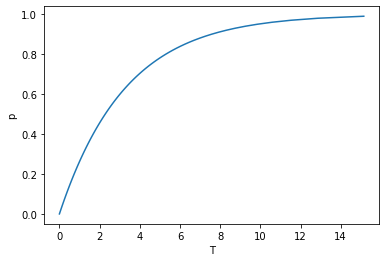

In [256]:


e=0.2
s=6
p=0.95
T=np.log(1-p)/np.log(1-(1-e)**s)
print(np.round(T))
y=np.arange(0,1,0.01)
x=np.log(1-y)/np.log(1-(1-e)**s)
plt.xlabel('T')
plt.ylabel('p')
plt.plot(x,y)



# Question 2 : Zhang 




In [2]:
import numpy as np
import cv2
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('../calibration-data/IMG*.JPG')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (6,8),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (6,8), corners2,ret)
        img = cv2.resize(img,(600,400))
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)


In [5]:
mtx

array([[1.36415093e+04, 0.00000000e+00, 3.31635835e+03],
       [0.00000000e+00, 1.36632517e+04, 1.50037365e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [6]:
rvecs

[array([[-0.30308673],
        [-0.28851426],
        [-1.48091972]]),
 array([[-0.46551317],
        [-0.49081548],
        [ 1.43916143]]),
 array([[ 0.18818416],
        [ 0.29457691],
        [-1.48636579]]),
 array([[ 0.08627606],
        [-0.67118704],
        [-1.48847968]]),
 array([[-0.01374999],
        [-0.67314056],
        [-1.46489526]]),
 array([[-0.0452197 ],
        [-0.02888149],
        [ 1.56740798]]),
 array([[-0.16482261],
        [-0.70770576],
        [ 1.44794072]]),
 array([[-0.0597692 ],
        [-0.44512663],
        [ 1.5718053 ]]),
 array([[ 0.14264087],
        [-0.32159586],
        [-1.55161639]]),
 array([[-0.13940432],
        [-0.48910322],
        [ 1.48323343]]),
 array([[-0.0826091 ],
        [-0.42946939],
        [-1.56560146]]),
 array([[-0.23711707],
        [ 0.24509901],
        [-1.49184868]]),
 array([[-0.33078737],
        [-0.31619836],
        [ 1.51072958]]),
 array([[-0.18327286],
        [ 0.17344747],
        [-1.52820168]]),
 array

In [7]:
from scipy.spatial.transform import Rotation as R
rmat = []
for rvec in rvecs:
    r = R.from_rotvec(rvec.flatten())
    rmat.append(r.as_matrix())
    

In [8]:
rmat

[array([[ 0.06943933,  0.99757855, -0.00389964],
        [-0.92608494,  0.0659151 ,  0.37151297],
        [ 0.37087041, -0.02218622,  0.92841958]]),
 array([[ 0.06793951, -0.81273266, -0.57866212],
        [ 0.99694573,  0.07769407,  0.00792777],
        [ 0.03851546, -0.57743334,  0.81552885]]),
 array([[ 0.05838931,  0.99523981,  0.0780282 ],
        [-0.94977241,  0.07945291, -0.30268729],
        [-0.30744601, -0.05643533,  0.94989052]]),
 array([[-0.06128268,  0.88540515, -0.46076258],
        [-0.93150764,  0.11508207,  0.34503571],
        [ 0.35852191,  0.45034858,  0.81770912]]),
 array([[-0.04132743,  0.91155408, -0.40909804],
        [-0.90413734,  0.14014274,  0.40360338],
        [ 0.42523842,  0.3865607 ,  0.81837834]]),
 array([[ 0.00329952, -0.99888188, -0.04716047],
        [ 0.9999412 ,  0.00280852,  0.01047377],
        [-0.01032961, -0.04719225,  0.99883241]]),
 array([[-0.03836841, -0.84604983, -0.5317213 ],
        [ 0.93931415,  0.15099755, -0.30804003],
        

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
tvecs

[array([[-4.55509233],
        [ 2.36236684],
        [33.21355303]]),
 array([[ 1.57539405],
        [-2.2871421 ],
        [32.37831111]]),
 array([[-5.56103617],
        [ 3.05096994],
        [32.04158322]]),
 array([[-4.82103689],
        [ 2.60986443],
        [32.91538117]]),
 array([[-4.24954134],
        [ 2.23865087],
        [31.18026797]]),
 array([[ 1.8926339 ],
        [-2.07960962],
        [31.18045696]]),
 array([[ 3.79722623],
        [-2.3826828 ],
        [32.91452234]]),
 array([[ 1.04306688],
        [-1.32219749],
        [37.19091933]]),
 array([[-4.07202339],
        [ 3.02555483],
        [38.01719704]]),
 array([[ 1.79026728],
        [-1.59859549],
        [41.38604868]]),
 array([[-4.84107996],
        [ 2.86982645],
        [34.38163295]]),
 array([[-5.08032212],
        [ 2.85615102],
        [32.73776745]]),
 array([[ 1.91477847],
        [-2.00591966],
        [31.81797242]]),
 array([[-5.20784864],
        [ 3.02570856],
        [32.31510232]]),
 array

In [10]:
projectionmat = []
reprojected_objects = []
for i in range (len(rmat)):
    rmatrix = rmat[i]
    tvector = tvecs[i]
    #print(rmatrix)
    projectionmat = mtx @ np.hstack((rmatrix,tvector))
    objpt = objpoints[i]
    objpt = np.hstack((objpt,np.ones(shape=(48,1))))
    #print(objpt.shape)
    reprojected_object  = (projectionmat@objpt.T).T
    print(reprojected_object)
    reprojected_object = reprojected_object/reprojected_object[:,[2]]
    reprojected_objects.append(reprojected_object[:,:2])
    
    print(reprojected_object)
    #print(projectionmat)
    

[[4.80097093e+04 8.21103526e+04 3.32135530e+01]
 [5.01869058e+04 7.00134652e+04 3.35844234e+01]
 [5.23641023e+04 5.79165777e+04 3.39552939e+01]
 [5.45412988e+04 4.58196903e+04 3.43261643e+01]
 [5.67184954e+04 3.37228029e+04 3.46970347e+01]
 [5.88956919e+04 2.16259154e+04 3.50679051e+01]
 [6.15446090e+04 8.29776796e+04 3.31913668e+01]
 [6.37218055e+04 7.08807921e+04 3.35622372e+01]
 [6.58990020e+04 5.87839047e+04 3.39331076e+01]
 [6.80761985e+04 4.66870172e+04 3.43039781e+01]
 [7.02533951e+04 3.45901298e+04 3.46748485e+01]
 [7.24305916e+04 2.24932424e+04 3.50457189e+01]
 [7.50795087e+04 8.38450065e+04 3.31691806e+01]
 [7.72567052e+04 7.17481191e+04 3.35400510e+01]
 [7.94339017e+04 5.96512316e+04 3.39109214e+01]
 [8.16110983e+04 4.75543442e+04 3.42817918e+01]
 [8.37882948e+04 3.54574568e+04 3.46526622e+01]
 [8.59654913e+04 2.33605693e+04 3.50235327e+01]
 [8.86144084e+04 8.47123335e+04 3.31469944e+01]
 [9.07916049e+04 7.26154460e+04 3.35178648e+01]
 [9.29688014e+04 6.05185586e+04 3.388873

[[1445.48549917 2472.19418312]
 [1494.35067371 2084.70052444]
 [1542.1484066  1705.67152131]
 [1588.91329675 1334.8328095 ]
 [1634.67846376  971.92175535]
 [1679.47562618  616.68683537]
 [1854.23545039 2499.97778102]
 [1898.61614648 2111.92095568]
 [1942.02672882 1732.34663047]
 [1984.49866197 1360.97968497]
 [2026.06206435  997.55676914]
 [2066.74577947  641.8256805 ]
 [2263.53221134 2527.79854673]
 [2303.41644978 2139.1773987 ]
 [2342.42829175 1759.05664402]
 [2380.59605078 1387.1604035 ]
 [2417.94682827 1023.22460834]
 [2454.50657772  666.99637484]
 [2673.37688001 2555.65655489]
 [2708.75264567 2166.469925  ]
 [2743.35412307 1785.80163049]
 [2777.20645792 1413.37503083]
 [2810.33371874 1048.92533605]
 [2842.75895394  692.19897895]
 [3083.77055733 2583.55188033]
 [3114.62579901 2193.79860629]
 [3144.80525313 1812.58165863]
 [3174.33088072 1439.62363288]
 [3203.22370145 1074.65901552]
 [3231.50384352  717.43355355]
 [3494.71434717 2611.48459808]
 [3521.03697749 2221.16351446]
 [3546.7

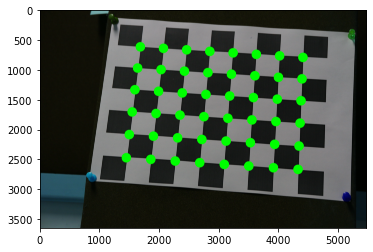

[[3980.09749603  535.22762776]
 [4007.89889916  956.57341907]
 [4035.63431723 1376.91916996]
 [4063.30398488 1796.26843651]
 [4090.90813564 2214.62475798]
 [4118.44700194 2631.99165688]
 [3643.51448991  551.08398687]
 [3672.22725168  980.05204626]
 [3700.87063091 1407.98353187]
 [3729.44487878 1834.88219639]
 [3757.95024526 2260.75177441]
 [3786.38697912 2685.59598255]
 [3294.48223282  567.52682775]
 [3324.15535804 1004.3980114 ]
 [3353.75545728 1440.19404878]
 [3383.28279978 1874.91890395]
 [3412.73765346 2308.57652149]
 [3442.12028493 2741.17082663]
 [2932.29701695  584.58930192]
 [2962.98316031 1029.66028019]
 [2993.59236527 1473.61534594]
 [3024.12492081 1916.45869078]
 [3054.5811145  2358.1944853 ]
 [3084.96123244 2798.82687931]
 [2556.2010788   602.30710747]
 [2587.95689402 1055.89157484]
 [2619.63156376 1508.31700014]
 [2651.22539866 1959.58782024]
 [2682.73870776 2409.70844939]
 [2714.17179853 2858.68327937]
 [2165.37730719  620.71873836]
 [2198.26383721 1083.14874139]
 [2231.0

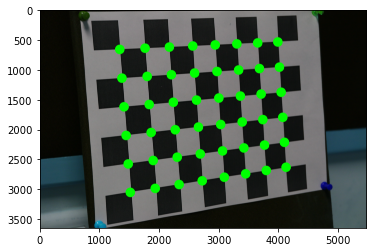

[[ 948.78099558 2801.375852  ]
 [ 950.94321266 2405.05212276]
 [ 953.1477355  2000.97395635]
 [ 955.395818   1588.91152033]
 [ 957.68876409 1168.62580898]
 [ 960.02793028  739.86818109]
 [1369.06850705 2837.61165805]
 [1375.31365119 2440.93354369]
 [1381.68120712 2036.48009551]
 [1388.17480958 1624.02044305]
 [1394.79823864 1203.3144842 ]
 [1401.55542706  774.11241924]
 [1790.84176993 2873.9755607 ]
 [1801.19886054 2476.9430417 ]
 [1811.75932756 2072.11421655]
 [1822.52922078 1659.25717069]
 [1833.51483233 1238.13069918]
 [1844.72270894  808.48383677]
 [2214.10867652 2910.4682404 ]
 [2228.60696556 2513.08130377]
 [2243.39046344 2107.87701267]
 [2258.46766965 1694.62240239]
 [2273.8474248  1273.07515859]
 [2289.5389279   842.98314349]
 [2638.87717517 2947.09038241]
 [2657.54614934 2549.34902179]
 [2676.58304189 2143.7691821 ]
 [2695.9988372  1730.11684238]
 [2715.80496126 1308.14857231]
 [2736.01330414  877.6110545 ]
 [3065.15527071 2983.84267691]
 [3088.02465366 2585.74689264]
 [3111.3

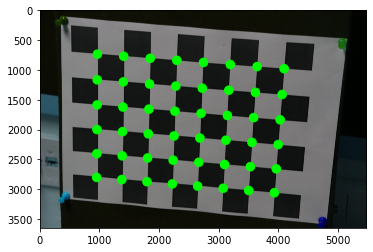

[[1318.31921085 2583.73448179]
 [1314.72337576 2189.55674252]
 [1311.20420392 1803.78287863]
 [1307.75926951 1426.14696871]
 [1304.38624798 1056.39419356]
 [1301.0829108   694.28026277]
 [1707.28347917 2616.23805124]
 [1699.60059026 2226.97855731]
 [1692.07933633 1845.90842362]
 [1684.71466966 1472.77190499]
 [1677.5017506  1107.32379543]
 [1670.43593686  749.32889071]
 [2085.88761619 2647.87588243]
 [2074.33407781 2263.41409216]
 [2063.02043646 1886.93524493]
 [2051.93929709 1518.19325948]
 [2041.08356552 1156.95206589]
 [2030.44643328  802.98510165]
 [2454.54009786 2678.68210942]
 [2439.31964084 2298.90183117]
 [2424.41115213 1926.90577479]
 [2409.80513759 1562.45704242]
 [2395.49248443 1205.32825238]
 [2381.46444229  855.30106609]
 [2813.62820501 2708.68909511]
 [2794.93275418 2333.47828195]
 [2776.61562716 1965.86028821]
 [2758.66545525 1605.60694842]
 [2741.07132075 1252.49914832]
 [2723.82273481  906.32638047]
 [3163.51938046 2737.92754462]
 [3141.52985354 2367.17810093]
 [3119.9

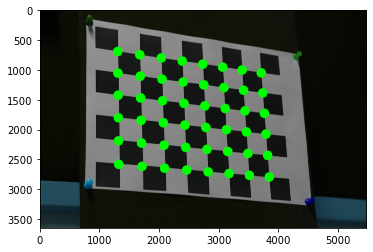

[[1457.16464728 2481.35464701]
 [1464.34162793 2077.29192842]
 [1471.32804617 1683.95783915]
 [1478.13139226 1300.93067957]
 [1484.75876896  927.81056465]
 [1491.21691631  564.21803145]
 [1873.85727155 2530.00054607]
 [1875.40885596 2130.17352326]
 [1876.91973414 1740.83607141]
 [1878.39148724 1361.58074018]
 [1879.82561559  992.02091182]
 [1881.22354378  631.78948652]
 [2280.46789842 2577.46944368]
 [2276.66081708 2181.79243664]
 [2272.95243857 1796.37379769]
 [2269.33897355 1420.81969265]
 [2265.81682418 1054.75619248]
 [2262.3825722   697.82803138]
 [2677.35805945 2623.80354605]
 [2668.44491016 2232.19335955]
 [2659.76015284 1850.6178556 ]
 [2651.29512002 1478.69621776]
 [2643.04157731 1116.0666582 ]
 [2634.9916967   762.38524385]
 [3064.87220474 2669.0430653 ]
 [3051.09233091 2281.41889857]
 [3037.66148969 1903.61292588]
 [3024.56658587 1535.25678253]
 [3011.79517124 1176.00030357]
 [2999.33540511  825.5104135 ]
 [3443.33870002 2713.22633579]
 [3424.91900567 2329.5096959 ]
 [3406.9

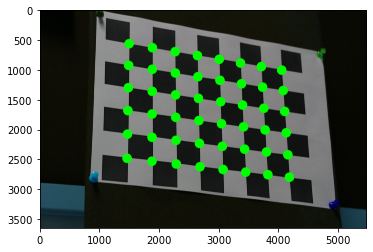

[[4144.38928526  589.09035101]
 [4146.10771512 1027.10701398]
 [4147.8272843  1465.41408581]
 [4149.54799396 1904.01185541]
 [4151.26984521 2342.90061208]
 [4152.99283921 2782.08064549]
 [3707.96927197  588.94157088]
 [3709.54546102 1027.62235685]
 [3711.12269668 1466.59443315]
 [3712.70097999 1905.85809004]
 [3714.28031201 2345.41361811]
 [3715.86069377 2785.26130837]
 [3270.22418655  588.79233903]
 [3271.65726231 1028.13926493]
 [3273.09129111 1467.77836669]
 [3274.52627389 1907.70993585]
 [3275.96221159 2347.93426436]
 [3277.39910519 2788.45164454]
 [2831.14798498  588.64265338]
 [2832.437069   1028.65774539]
 [2833.72701159 1468.96590279]
 [2835.01781362 1909.56741848]
 [2836.30947594 2350.46258573]
 [2837.60199941 2791.65169821]
 [2390.73458643  588.49251187]
 [2391.8787942  1029.17780538]
 [2393.0237652  1470.15705791]
 [2394.16950022 1911.43056369]
 [2395.316      2352.99861733]
 [2396.46326533 2794.86151384]
 [1948.97787299  588.34191241]
 [1949.9763139  1029.69945216]
 [1950.9

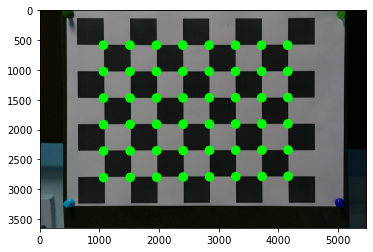

[[4890.12862708  511.29064087]
 [4858.25682111  907.35439924]
 [4827.03182886 1295.38034933]
 [4796.43415821 1675.61071496]
 [4766.4450925  2048.27808398]
 [4737.0466523  2413.60588276]
 [4558.78002916  559.35454675]
 [4529.86030714  961.10210363]
 [4501.53655814 1354.57051103]
 [4473.79054746 1740.01308189]
 [4446.6047768  2117.67289955]
 [4419.96244744 2487.78332888]
 [4216.80748187  608.95951393]
 [4191.04585715 1016.55488139]
 [4165.82345664 1415.61874904]
 [4141.12352572 1806.41620561]
 [4116.92999674 2189.20147002]
 [4093.22745424 2564.2184429 ]
 [3863.69171088  660.18086597]
 [3841.30973857 1073.79517694]
 [3819.40372047 1478.61395064]
 [3797.9586345  1874.914792  ]
 [3776.96008417 2262.96374521]
 [3756.39426635 2643.01588932]
 [3498.87904011  713.09891657]
 [3480.11521128 1132.910837  ]
 [3461.75686242 1543.65076457]
 [3443.79099059 1945.60961998]
 [3426.20514294 2339.06601644]
 [3408.98738795 2724.2869038 ]
 [3121.77849486  767.79938981]
 [3106.88977895 1193.99556036]
 [3092.3

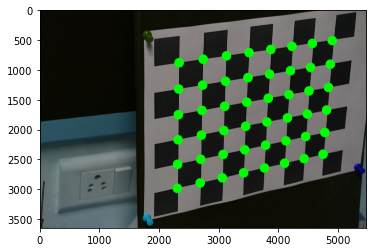

[[3698.95191788 1014.62289647]
 [3673.79342753 1371.84665009]
 [3648.94803844 1724.62469939]
 [3624.40994188 2073.03952235]
 [3600.17347189 2417.17156929]
 [3576.23310099 2757.09932478]
 [3351.17009531 1016.03449129]
 [3327.99417005 1376.28180604]
 [3305.10910584 1732.00796757]
 [3282.50946129 2083.29755676]
 [3260.18992993 2430.23305783]
 [3238.14533599 2772.89492283]
 [2997.3949041  1017.47041231]
 [2976.27366246 1380.79290683]
 [2955.41975043 1739.51686213]
 [2934.82812456 2093.72903411]
 [2914.4938675  2443.51400998]
 [2894.41218406 2788.95427566]
 [2637.47007099 1018.93129381]
 [2618.47850371 1385.38191994]
 [2599.72937348 1747.15461688]
 [2581.21806748 2104.33839075]
 [2562.9400892  2457.02000389]
 [2544.89105477 2805.28404514]
 [2271.23384209 1020.41779233]
 [2254.44994774 1390.05088144]
 [2237.88216268 1754.92457759]
 [2221.5263397  2115.13021565]
 [2205.37843699 2470.7568083 ]
 [2189.43451488 2821.89111942]
 [1898.51874055 1021.93058763]
 [1884.02366863 1394.80189891]
 [1869.7

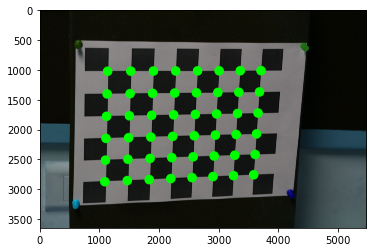

[[1855.21577593 2587.74779909]
 [1855.24761277 2228.51254755]
 [1855.27926164 1871.3981808 ]
 [1855.31072422 1516.38597194]
 [1855.34200214 1163.45741386]
 [1855.37309701  812.59421608]
 [2206.93709283 2587.15629972]
 [2205.9352334  2230.64129933]
 [2204.93924421 1876.21524208]
 [2203.94907382 1523.85982185]
 [2202.96467137 1173.5569458 ]
 [2201.98598662  825.28873128]
 [2553.35963604 2586.57371145]
 [2551.35506018 2232.73807443]
 [2549.36214185 1880.96015509]
 [2547.38077966 1531.2220556 ]
 [2545.41087339 1183.50608509]
 [2543.45232396  837.79475669]
 [2894.60225144 2585.99983441]
 [2891.62490215 2234.80358798]
 [2888.66473881 1885.63452871]
 [2885.72161306 1538.475155  ]
 [2882.79537822 1193.30816615]
 [2879.88588931  850.11645948]
 [3230.7802572  2585.43447465]
 [3226.85908147 2236.83853394]
 [3222.96037268 1890.23992433]
 [3219.0839383  1545.62152885]
 [3215.22958797 1202.96642558]
 [3211.39713353  862.25788483]
 [3562.00557365 2584.87744397]
 [3557.16856142 2238.84358589]
 [3552.3

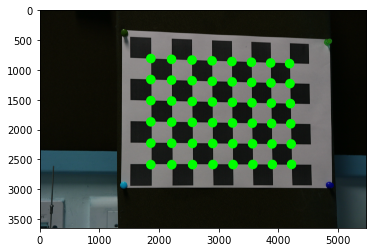

[[3906.4593257   972.61095831]
 [3906.72448917 1295.1636296 ]
 [3906.98676208 1614.20013878]
 [3907.24619145 1929.77766897]
 [3907.50282326 2241.95216999]
 [3907.75670252 2550.77839148]
 [3606.46555834 1000.94174099]
 [3608.39254811 1326.33507486]
 [3610.29833755 1648.14849954]
 [3612.18327459 1966.44076992]
 [3614.04769963 2281.26936218]
 [3615.89194565 2592.69050832]
 [3300.81242212 1029.8069826 ]
 [3304.46401085 1358.09128484]
 [3308.07505084 1682.73018294]
 [3311.64621375 2003.78406171]
 [3315.17815652 2321.31197967]
 [3318.67152171 2635.37170515]
 [2989.33824648 1059.22195098]
 [2994.77990113 1390.4488703 ]
 [3000.16056045 1717.96307824]
 [3005.48124428 2041.8266504 ]
 [3010.74294982 2362.10028618]
 [3015.94665232 2678.84334672]
 [2671.87514376 1089.20250108]
 [2679.17516398 1423.42507712]
 [2686.39258076 1753.86575488]
 [2693.52878826 2080.58836437]
 [2700.58514945 2403.65530725]
 [2707.56299696 2723.1275965 ]
 [2348.24870743 1119.76510349]
 [2357.47837238 1457.037817  ]
 [2366.6

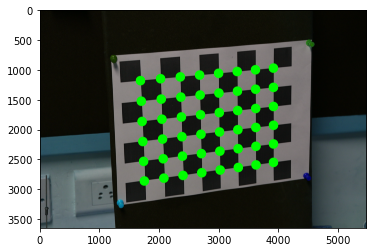

[[1395.57588866 2640.84191436]
 [1392.5967732  2257.35143781]
 [1389.67133573 1880.77073028]
 [1386.79813845 1510.91470785]
 [1383.97579444 1147.60483828]
 [1381.20296545  790.66885366]
 [1792.40656043 2641.13422384]
 [1785.86093498 2260.03157414]
 [1779.43252065 1885.75324911]
 [1773.11819709 1518.11757275]
 [1766.91495369 1156.94926107]
 [1760.81988488  802.07914343]
 [2184.27609074 2641.42287888]
 [2174.25268584 2262.67850448]
 [2164.40766595 1890.67458552]
 [2154.73631101 1525.23277077]
 [2145.23406607 1166.18094618]
 [2135.89653407  813.35296458]
 [2571.27693724 2641.70794761]
 [2557.8620196  2265.29284215]
 [2544.68438833 1895.53585956]
 [2531.73780283 1532.26189274]
 [2519.01623947 1175.3019216 ]
 [2506.5138822   824.49275083]
 [2953.49927437 2641.98949643]
 [2936.77672737 2267.87518545]
 [2920.34817884 1900.3381641 ]
 [2904.20594318 1539.20649122]
 [2888.34260036 1184.31416696]
 [2872.75098453  835.50087836]
 [3331.03106333 2642.26759015]
 [3311.08246454 2270.42611813]
 [3291.4

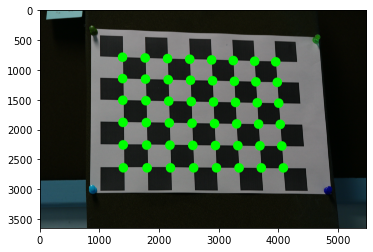

[[1199.43752458 2692.40088276]
 [1224.92982295 2276.29385567]
 [1250.44564617 1859.80283586]
 [1275.98502682 1442.92729157]
 [1301.54799755 1025.66669001]
 [1327.13459104  608.02049745]
 [1579.23037522 2731.00910732]
 [1605.1390328  2311.00985801]
 [1631.07182425 1890.61938029]
 [1657.02878329 1469.83712727]
 [1683.00994372 1048.66255103]
 [1709.01533941  627.09510263]
 [1966.22544888 2770.34948111]
 [1992.56174972 2346.38450858]
 [2018.92281558 1922.0208655 ]
 [2045.30868144 1497.25798928]
 [2071.71938228 1072.09531625]
 [2098.15495321  646.53228171]
 [2360.62957633 2810.44302972]
 [2387.40522678 2382.4367312 ]
 [2414.20629665 1954.02410557]
 [2441.03282216 1525.20457396]
 [2467.88483959 1095.97755637]
 [2494.76238529  666.34247169]
 [2762.65758445 2851.3115916 ]
 [2789.88473339 2419.18618158]
 [2817.13798044 1986.64656522]
 [2844.41736315 1553.69214669]
 [2871.72291912 1120.32232901]
 [2899.05468605  686.53651407]
 [3172.53268646 2892.9778577 ]
 [3200.2239466  2456.65328315]
 [3227.9

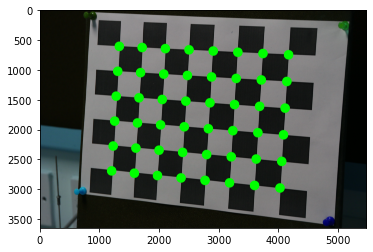

[[4137.29275474  638.99301845]
 [4153.00405272 1068.10051771]
 [4168.71712583 1497.25649941]
 [4184.43197437 1926.46097178]
 [4200.14859865 2355.71394303]
 [4215.86699896 2785.01542139]
 [3750.61227449  642.18004021]
 [3766.50287878 1076.78917236]
 [3782.39530147 1511.44803814]
 [3798.28954289 1946.15664609]
 [3814.18560334 2380.91500475]
 [3830.08348314 2815.72312265]
 [3353.88859365  645.44983805]
 [3369.96257954 1085.70350935]
 [3386.03842872 1526.00821454]
 [3402.11614151 1966.36396248]
 [3418.19571823 2406.77076204]
 [3434.27715921 2847.22862212]
 [2946.72528801  648.80567931]
 [2962.9868684  1094.85243733]
 [2979.25035864 1540.95158115]
 [2995.51575904 1987.10311999]
 [3011.78306996 2433.30706308]
 [3028.05229171 2879.56341965]
 [2528.7047917   652.25100557]
 [2545.15832317 1104.24534006]
 [2561.61381279 1556.2934667 ]
 [2578.07126089 2008.39539509]
 [2594.53066785 2460.55113483]
 [2610.992034   2912.76069553]
 [2099.38696881  655.78944444]
 [2116.03695799 1113.89210855]
 [2132.6

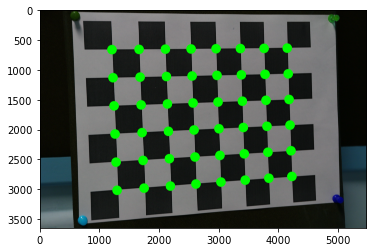

[[1117.91518348 2779.68315877]
 [1133.09192164 2357.0797529 ]
 [1148.26656279 1934.53473914]
 [1163.43910738 1512.0481054 ]
 [1178.60955582 1089.61983957]
 [1193.77790856  667.24992956]
 [1516.23551576 2803.25530006]
 [1531.4915927  2377.66930637]
 [1546.74554681 1952.14253168]
 [1561.99737852 1526.67496361]
 [1577.24708828 1101.26658981]
 [1592.49467653  675.91739793]
 [1920.21548453 2827.16237215]
 [1935.5516309  2398.55139129]
 [1950.88562812 1970.00047398]
 [1966.21747667 1541.50960759]
 [1981.54717698 1113.07877951]
 [1996.87472951  684.70797711]
 [2329.97657748 2851.41156456]
 [2345.39353102 2419.73228658]
 [2360.80830864 1988.11393492]
 [2376.22091081 1556.55649666]
 [2391.63133798 1125.05995893]
 [2407.03959061  693.62430882]
 [2745.64378444 2876.01027403]
 [2761.14228996 2441.21845217]
 [2776.6385923  2006.48843811]
 [2792.13269192 1571.82021865]
 [2807.62458929 1137.21378064]
 [2823.11428487  702.6691109 ]
 [3167.34572448 2900.9661121 ]
 [3182.92653381 2463.01653554]
 [3198.5

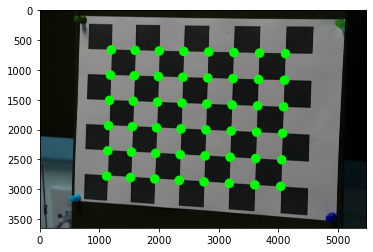

[[1844.80924488 2765.01609886]
 [1836.01623329 2327.28902484]
 [1827.32790141 1894.77303697]
 [1818.742391   1467.37562991]
 [1810.25788754 1045.00647491]
 [1801.87261896  627.57735618]
 [2265.70762969 2764.2843511 ]
 [2254.52770448 2331.72532265]
 [2243.47931404 1904.25546518]
 [2232.56015064 1481.78549078]
 [2221.76796019 1064.22818811]
 [2211.10054077  651.49836235]
 [2676.73366961 2763.56976678]
 [2663.28022731 2336.05817383]
 [2649.9832336  1913.51806555]
 [2636.83997525 1495.86322401]
 [2623.84780145 1083.00941342]
 [2611.00412195  674.87432358]
 [3078.23067825 2762.87174904]
 [3062.61121007 2340.29115496]
 [3047.17129766 1922.5683948 ]
 [3031.90786254 1509.62018141]
 [3016.81789622 1101.36512076]
 [3001.89845821  697.72365847]
 [3470.52623317 2762.18972837]
 [3452.84268406 2344.42767965]
 [3435.36011572 1931.41366718]
 [3418.07512114 1523.06720329]
 [3400.98436993 1119.30960929]
 [3384.08460611  720.06396497]
 [3853.93306726 2761.52316109]
 [3834.28216975 2348.47100767]
 [3814.8

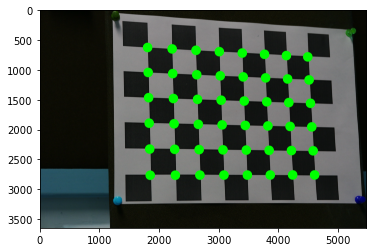

In [17]:
for i in range(len(reprojected_objects)):
    object_points = reprojected_objects[i]
    print(object_points)
    print(images[i])
    
    imageread = cv2.imread(images[i])
    for j in range(48):
        imageread = cv2.circle(imageread,(int(object_points[j,0]), int(object_points[j,1])),80,(0,255,0),-1)
    plt.imshow(imageread)
    #plt.scatter(object_points[:,0],object_points[:,1])
    plt.show()
    #plt.scatter(object_points[:,0],object_points[:,1])
    

In [292]:
len(objpoints[0])

48

In [288]:
for i in range(len(objpoints)):
    
    
    for  in range(len(objpoints[0])):
        for i in range (len(world_cord_x)):
    homo = [world_cord_x[i],world_cord_y[i],world_cord_z[i],1] # converting euclidean to homogeneous coordinate
    #print(type(homo))
    list_of_homogenous_worldcord.append(homo) # appending to list to make a list of list.
    

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 1 dimension(s)

## Q3 : DIY



In [233]:
%matplotlib tk

x_list_mpl= []
y_list_mpl = []

fig = plt.figure(figsize=(30,30))

path = "../calibration-data/"

img= cv2.imread(os.path.join(path,"my.jpg"))

 

def onclick(event):
    x_cor = event.xdata
    y_cor = event.ydata
    x_list_mpl.extend([x_cor])
    y_list_mpl.extend([y_cor])
    
 

cid = fig.canvas.mpl_connect('button_press_event', onclick)

 

imgplot = plt.imshow(img)
plt.show() 

In [234]:
x_list_mpl

[1813.479021631293,
 2018.0732335009461,
 1213.8063316685184,
 832.8377992215792,
 515.3640221824626,
 1178.5314675530608,
 875.1676361601276,
 536.5289406517377,
 1206.7513588454267,
 875.1676361601276,
 600.0236960595603,
 1735.874320577287,
 1905.1936683314825]

In [235]:
y_list_mpl

[2033.307565440809,
 1779.3285438095158,
 2110.912266494815,
 1948.6478915637113,
 1786.3835166326076,
 2407.221125064657,
 2244.956750133553,
 2089.7473480255408,
 2661.2001466959496,
 2498.935771764846,
 2400.166152241565,
 2604.7603641112178,
 2343.7263696568334]

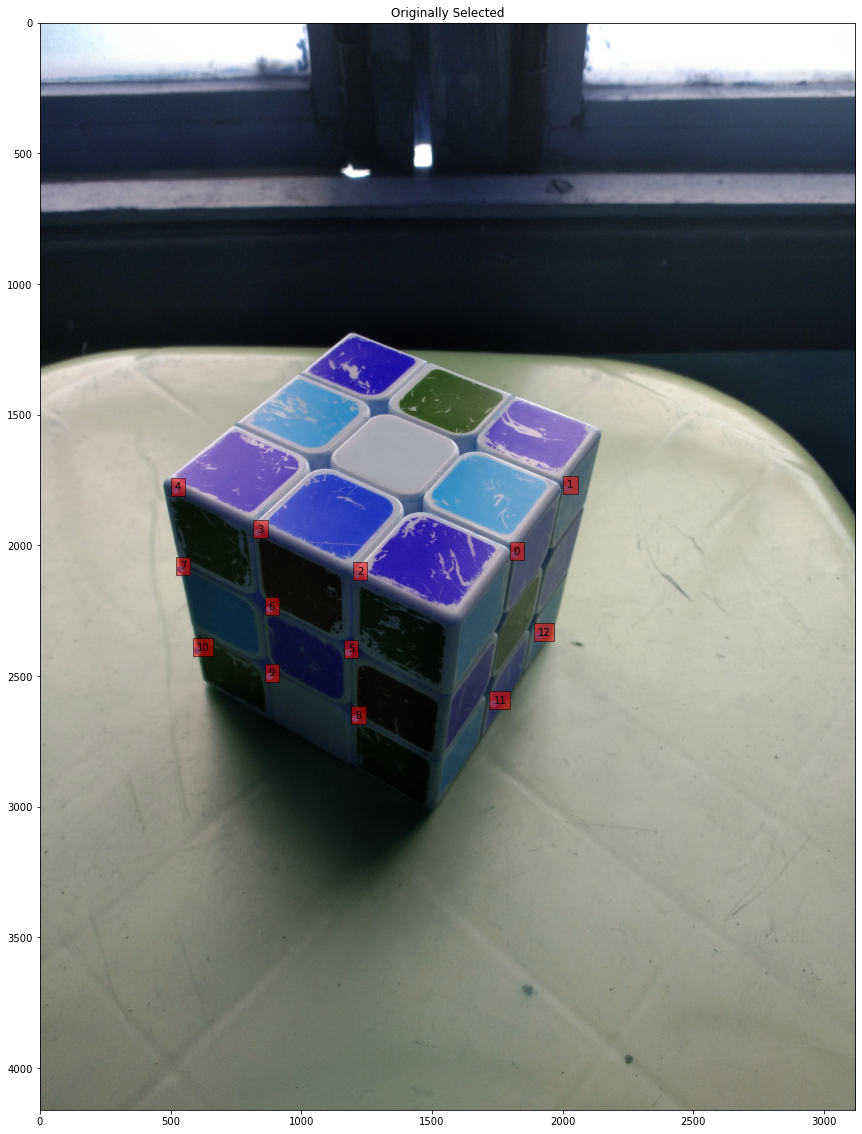

In [237]:
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.scatter(x_list_mpl,y_list_mpl)
plt.title('Originally Selected')

for i in range(len(x_list_mpl)):
    tupl = list(zip(x_list_mpl,y_list_mpl))
    plt.text(x_list_mpl[i],y_list_mpl[i],i,bbox=dict(facecolor='red', alpha=0.5))


plt.show()

In [239]:
world_cord_mpl = np.array([[1,0,0],[2,0,0],[0,0,1],[0,0,2],[0,0,3],[0,1,1],[0,1,2],[0,1,3],[0,2,1],[0,2,2],[0,2,3],[1,2,0],[2,2,0]], dtype = np.float32)
world_cord_mpl

array([[1., 0., 0.],
       [2., 0., 0.],
       [0., 0., 1.],
       [0., 0., 2.],
       [0., 0., 3.],
       [0., 1., 1.],
       [0., 1., 2.],
       [0., 1., 3.],
       [0., 2., 1.],
       [0., 2., 2.],
       [0., 2., 3.],
       [1., 2., 0.],
       [2., 2., 0.]], dtype=float32)

[0.2 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.4]
-------------------------------
Projection matrix is:
[[ 2.56662547e+03  5.39038871e+15 -1.60677067e+03  2.10425567e+03]
 [-2.67960703e+03  1.10101919e+16  2.96734419e+03  2.07392156e+03]
 [-6.35489142e-01  4.57381823e+12  1.75099659e+00  1.00000000e+00]]
-------------------------------
[(2999, 1762), (4198, 1344), (1320, 1976), (860, 1918), (556, 1880), (1179, 2407), (1179, 2407), (1179, 2407), (1179, 2407), (1179, 2407), (1179, 2407), (1179, 2407), (1179, 2407)]
-------------------------------
2999 1762
1813.479021631293 2033.307565440809
-------------------------------
4198 1344
2018.0732335009461 1779.3285438095158
-------------------------------
1320 1976
1213.8063316685184 2110.912266494815
-------------------------------
860 1918
832.8377992215792 1948.6478915637113
-------------------------------
556 1880
515.3640221824626 1786.3835166326076
-------------------------------
1179 2407
1178.5314675530608 2407.221125064657
-----

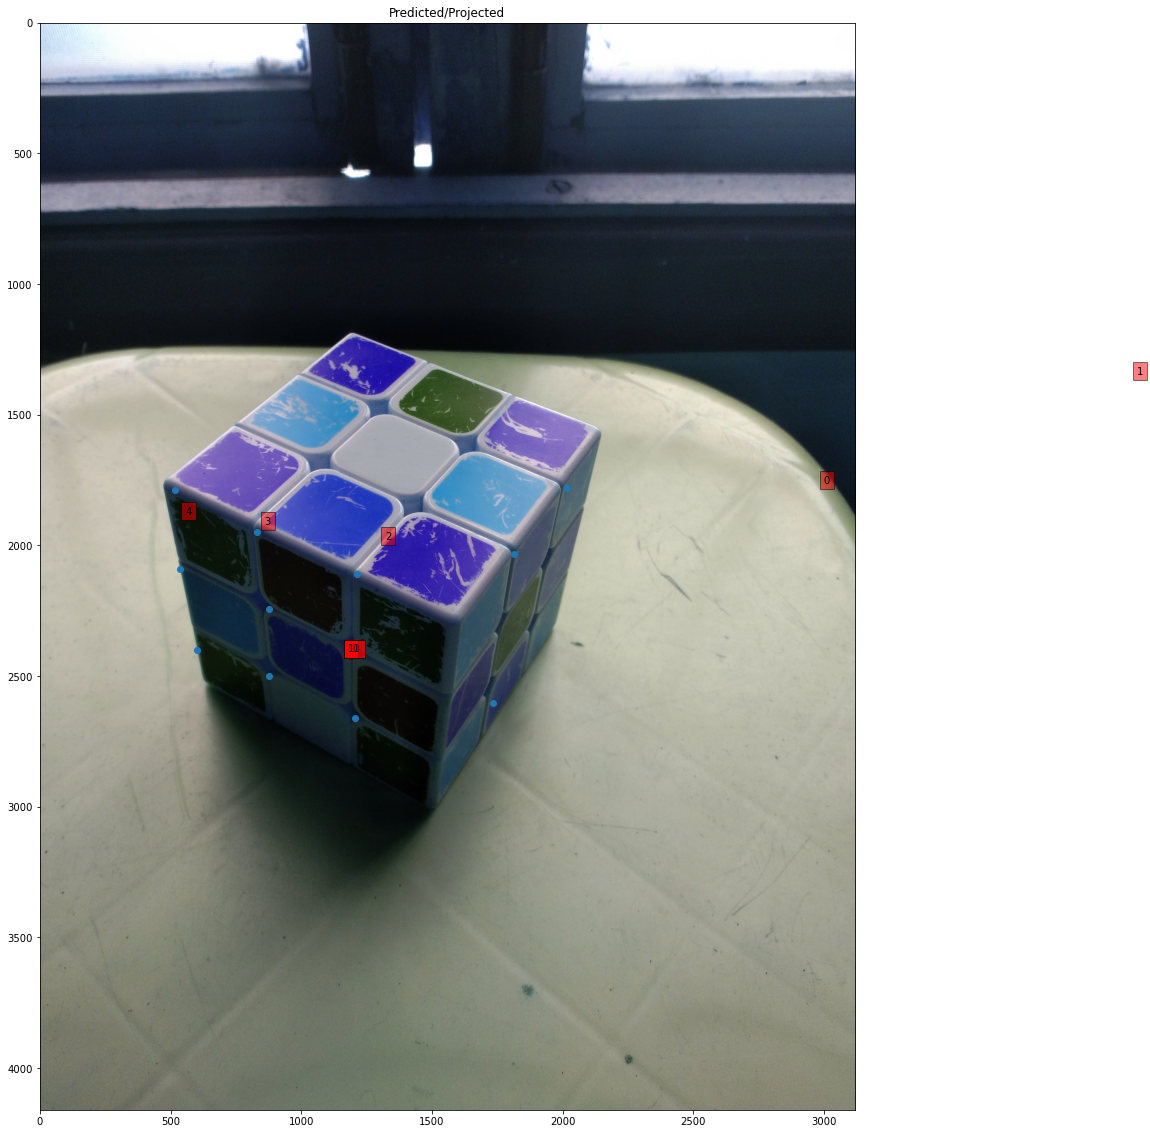

In [253]:

# each block = 2cm

#manually finding the world coordinate.

x_list = x_list_mpl
y_list = y_list_mpl

world_cord = world_cord_mpl

world_cord = world_cord*0.2


world_cord_x = world_cord[:,0]
world_cord_y = world_cord[:,1]
world_cord_z = world_cord[:,2]

print(world_cord_x)
print('-------------------------------')


list_of_homogenous_worldcord = [] # making an empty list

for i in range (len(world_cord_x)):
    homo = [world_cord_x[i],world_cord_y[i],world_cord_z[i],1] # converting euclidean to homogeneous coordinate
    #print(type(homo))
    list_of_homogenous_worldcord.append(homo) # appending to list to make a list of list.
    
    
    

#----------------------------------------------------------    
    
Matx = np.zeros(24).reshape(2,12)

for i in range (6):
    internal_parameters = np.array([[world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, 0, 0, 0, 0, -(x_list[i]*world_cord_x[i]), -(x_list[i]*world_cord_y[i]), -(x_list[i]*world_cord_z[i]), -(x_list[i])],
                                   [0, 0, 0, 0, world_cord_x[i], world_cord_y[i], world_cord_z[i], 1, -(y_list[i]*world_cord_x[i]), -(y_list[i]*world_cord_y[i]), -(y_list[i]*world_cord_z[i]), -(y_list[i])]])
    
    Matx = np.vstack((Matx,internal_parameters))
    
Matx = Matx[2:] # removing the first two rows


u, s, vh = np.linalg.svd(Matx, full_matrices=True) # performing svd on the matrix

transpose_of_vt = vh.T

p = transpose_of_vt[:,11] 

p = p.reshape(3,4) # reshape the vector to form a 3x4 projection matrix.

# to make p34 = 1 we will divide the whole matrix by the last term.
#It was verified that result with and without dividing the whole matrix by the last term yeilds the same result.

projection_matx = p/p[2][3]
#projection_matx = p
print('Projection matrix is:')
print(projection_matx)
print('-------------------------------')



    

#----------------------------------------------------------

list_of_projected_image_cord_in_euclidean = []

for i in range (len(list_of_homogenous_worldcord)):
    world_cord_homo = list_of_homogenous_worldcord[i] # selecting points one by one and finding projection
    projection = projection_matx@world_cord_homo# using projection matrix having p34 as 1
    projection = projection/projection[2]
    list_of_projected_image_cord_in_euclidean.append(projection)
    


    
x_list_projected = []
y_list_projected = []

for i in range(len(list_of_projected_image_cord_in_euclidean)):
    x_list_projected.append(list_of_projected_image_cord_in_euclidean[i][0])
    y_list_projected.append(list_of_projected_image_cord_in_euclidean[i][1])

x_list_projected = [round(num) for num in x_list_projected] #rounding to nearest int
y_list_projected = [round(num) for num in y_list_projected]




projected_coordinates = list(zip(x_list_projected,y_list_projected))    

print (projected_coordinates)
print('-------------------------------')


#----------------------------------------------------------------------

#now to find error over just the first 6 points that were used to find the projection matrix :


summation = 0.0

for i in range(6):
    print(x_list_projected[i],y_list_projected[i])
    print(x_list[i],y_list[i])
    print('-------------------------------')
    summation = summation + ((x_list_projected[i]-x_list[i])**2) + ((y_list_projected[i]-y_list[i])**2)

mean = summation/25

error = (mean)**0.5

print(f'error is {error}')
print('-------------------------------')

#now to find error over just the first 6 points that were used to find the projection matrix :


summation = 0.0

for i in range(6):
    print(x_list_projected[i],y_list_projected[i])
    print(x_list[i],y_list[i])
    print('-------------------------------')
    summation = summation + ((x_list_projected[i]-x_list[i])**2) + ((y_list_projected[i]-y_list[i])**2)

mean = summation/25

error = (mean)**0.5

print(f'error is {error}')
print('-------------------------------')

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.scatter(x_list[:12],y_list[:12])
plt.title('Predicted/Projected')

for i in range(12):
    tupl = list(zip(x_list_projected,y_list_projected))
    plt.text(x_list_projected[i],y_list_projected[i],i,bbox=dict(facecolor='red', alpha=0.5))


plt.show()










In [ ]:
# As can be seen, points are somewhat close to the original points only.